# Top 5 Zip Codes in Florida to Invest In
**Author:** Aziza Gulyamova
***



## Overview


For this project, I will be acting as a consultant for a real-estate investment firm. The main goal for my project is to identify **Top 5 zip codes** that are worth investing in anfd **forecast the price**. The assumptions of the best Zip code are following: 

* The minimum capital for entering the market is \$200,000
* Highly urbanized U.S. areas
* Low risk factor (low volatility threshold)

***

### Why Florida State?

Florida real estate has always been a good deal for investors. Stunning beaches, beautiful weather, numerous landmarks and attractions, various opportunities and no income tax are just a few of the top reasons why new residents and investors are attracted to Florida. In 2019 Florida became one of the seven states that forgo individual income taxes. In addition, mortgage rates are still at the lowest levels since the 1960s. The housing market is more stable compared to the early 2010s.

Source: Florida Property Management & Sales  
Link to article: https://floridapropertyrealty.com/tax-benefits-florida-real-estate/
***

## Data

The **Home Listing and Sales** dataset was provided by **Zillow Research**. The data represents **median monthly housing sales prices** over the period of April 1996 through April 2018.

Each row represents a unique zip code. Each record contains location info and median housing sales prices for each month.

The raw CSV contained the following **columns:**

RegionID  
RegionName -- ZIP Code  
City  
State  
Metro   
CountyName  
SizeRank -- rank of the zipcode according to urbanization.

**Link to dataset:** https://www.zillow.com/research/data/

## Plan of Analysis

<br>
<details><summary><b>Data Exploration</b></summary>
    <ul>
        <li>Import Packages</li>
        <li>Upload Dataset</li>
        <li>Explore Dataset</li>
        <li>Visual Exploration</li>
    </ul>
</details>     
<details><summary><b>Exploration Analysis</b></summary>
    <ul>
        <li>Minimum Price</li>
        <li>Volatility</li>
        <li>ROI for 24 Months</li>
    </ul>
</details>     
<details><summary><b>Data Preparation</b></summary>
    <ul>
        <li>Sationarity</li>
        <li>Non Stationary to Stationary</li>
        <li>ACF and PACF</li>
    </ul>
</details>     
  
<details><summary><b>BASELINE AUTO-ARIMA MODEL</b></summary>
    <ul>
        <li><b>Train Test Split</b></li>
        <li>## 33064 Zipcode Model</li>
        <li>## 33157 Zipcode Model</li>
        <li>## 32825 Zipcode Model</li>
        <li>## 33463 Zipcode Model</li>
        <li>## 34698 Zipcode Model</li>
        <li>## 33020 Zipcode Model</li>
        <li>## 33033 Zipcode Model</li>
        <li>## 32771 Zipcode Model</li>
    </ul>
</details>     
<b>SARIMAX (2, 0, 0) Model</b>
<details><summary><b>Facebook Prophet Model</b></summary>
    <ul>
        <li>Train - Test Split</li>
        <li>## 33064 Zipcode</li>
        <li>## 33033 Zipcode</li>
        <li>## 33157 Zipcode</li>
    </ul>
</details> 
<b>Final SARIMAX (2, 0, 0) Model</b>
<details><summary><b>Results and Conclusions</b></summary>
    <ul>
        <li>Results</li>
        <li>Notes</li>
        <li>Next Steps</li>
    </ul>
</details> 

# Data Exploration
Before proceeding to any analysis and modeling, I will need to upload necessary packages and upload dataset. After that, the data needs to bee explored and cleaned from unnecessary columns and observations.



## Import Packages

Import necessary packages and libraries for data cleaning and manipulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from datetime import datetime

from sklearn.metrics import mean_squared_error



from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
#from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller #perform dickey-fuller test

from statsmodels.tsa.statespace.sarimax import SARIMAX  #seasonal ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

from pmdarima import auto_arima                              # for determining ARIMA orders

from fbprophet import Prophet

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import itertools


# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('./src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import explore_data as ed
import ts_functions as tsf

Import and load modeling and forecasting tools

Adjust the notebook settings

In [2]:
pd.options.display.max_rows = 700
pd.options.display.max_columns = 100
plt.style.use('seaborn')

## Upload Dataset

The dataset is provided by **Zillow Resarch** and stored in **Dataset folder** of the project. I will upload data into **zillow** variable and store all features as an object data type in order to keep possible leading zeros.

In [3]:
zillow = pd.read_csv('./data/zillow_data.csv', dtype = 'object' )

In [4]:
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200,335400,336500,337600,338500,339500,340400,341300,342600,344400,345700,346700,347800,349000,350400,352000,353900,356200,358800,361800,365700,370200,374700,378900,383500,388300,393300,398500,403800,409100,414600,420100,426200,432600,438600,444200,450000,455900,462100,468500,475300,482500,490200,...,863900,872900,883300,889500,892800,893600,891300,889900,891500,893000,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700,236900,236700,235400,233300,230600,227300,223400,219600,215800,211100,205700,200900,196800,193600,191400,190400,190800,192700,196000,201300,207400,212200,214600,215100,213400,210200,206100,202100,198800,196100,194100,193400,193400,193100,192700,193000,193700,194800,196100,197800,199700,201900,...,234200,235400,236600,238500,240500,242600,244700,246300,247600,249600,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400,212200,212200,210700,208300,205500,202500,199800,198300,197300,195400,193000,191800,191800,193000,195200,198400,202800,208000,213800,220700,227500,231800,233400,233900,233500,233300,234300,237400,242800,250200,258600,268000,277000,283600,288500,293900,299200,304300,308600,311400,312300,311900,...,282100,284200,286000,288300,290700,293300,295900,298300,300200,301300,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100,500900,503100,504600,505500,505700,505300,504200,503600,503400,502200,500000,497900,496300,495200,494700,494900,496200,498600,502000,507600,514900,522200,529500,537900,546900,556400,566100,575600,584800,593500,601600,610100,618600,625600,631100,636600,642100,647600,653300,659300,665800,672900,...,1149900,1155200,1160100,1163300,1167700,1173900,1175100,1173500,1175500,1178500,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300,77300,77300,77300,77400,77500,77600,77700,77700,77800,77900,77900,77800,77800,77800,77800,77800,77900,78100,78200,78400,78600,78800,79000,79100,79200,79300,79300,79300,79400,79500,79500,79600,79700,79900,80100,80300,80600,80900,81200,81400,81700,82100,...,112000,112500,112700,113100,113900,11

In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: object(272)
memory usage: 30.6+ MB


* The data appears to be stored in **wide format**, meaning that the **observations of time feature are stored as individual columns** with median **house price value as observations**. 

## Explore Data

* Extract data for **Florida State**
* Choose **highly urbanized** zipcodes
* Remove **unnecessary variables**
* Check for missing values

For my project, I chose to focus on **zipcodes of the FL state**, since it is one of the states with **high inbound migration** percentage and also has **no state income taxation**. Thus, the real estate market there is at **high performance.** 

First, I will select observations only for FL state.

In [6]:
fl_df = zillow[zillow['State']=='FL']
fl_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000,100700,100400,100100,99800,99500,99200,98900,98600,98000,97100,95800,94300,92800,91500,90500,89800,89500,89300,89400,89800,90500,91500,92700,94100,95700,97200,98400,99400,100300,101200,102400,104000,106000,108300,110700,113200,115700,117900,119700,121200,122400,123400,...,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
60,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale,Miami-Dade,61,337300,337900,338300,338400,338400,338200,338000,338000,338400,339100,339400,339000,338500,337900,337000,335900,334800,333800,333000,332400,332600,333300,333800,333900,334000,334100,334200,334300,334500,334900,335600,336600,338500,341000,343400,345500,347800,350200,352600,355100,357700,360600,363800,...,1016000,1023400,1032400,1043400,1072200,1115700,1147800,1151900,1150200,1141400,1134200,1152000,1197200,1236200,1264200,1290500,1304300,1308200,1317500,1335100,1350100,1358200,1365200,1377400,1389700,1393600,1388400,1386800,1393400,1394800,1390500,1401200,1419300,1431100,1441200,1447700,1449600,1465500,1479400,1474400,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
82,72363,33025,Miramar,FL,Miami-Fort Lauderdale,Broward,83,111600,111700,111800,111900,112000,112100,112200,112300,112500,112700,112800,112700,112600,112500,112300,112200,112100,112100,112200,112400,112800,113400,114000,114300,114600,114900,115000,115100,115100,115200,115200,115300,115500,115900,116200,116400,116600,116800,116900,117000,117100,117300,117500,...,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
83,72578,33411,Royal Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,84,126800,126800,126800,126800,126700,126700,126800,126800,127000,127100,127200,127100,127000,127100,127200,127600,128000,128600,129300,130100,131100,132000,132900,133400,133800,134100,134300,134500,134500,134500,134600,134600,134700,134800,135000,135100,135400,135800,136200,136700,137300,138000,138700,...,216800,219400,222500,226600,230600,233100,234300,235800,237500,239100,240400,242200,245000,247600,249300,250600,251900,253300,255400,257900,260400,263600,266800,268600,269600,271100,273200,275100,276800,278800,280900,282900,284600,286400,288300,290100,291600,292800,294100,295700,297400,299300,301400,303300,304900,307100,309800,311700,312600,313100
84,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,480200,480700,481200,481600,482000,482500,483100,483700,484800,486100,486900,486900,486600,486300,485800,485100,484300,483500,482700,482000,481900,482100,482000,481400,481000,480900,481000,481500,482400,483800,485600,487900,491

* Now, I will drop columns that are not needed for my analysis, rename the **RegionName** feature to **Zipcode** and reset index.

In [7]:
fl_df.drop(columns = ["RegionID", "City", "State", "Metro", "CountyName"], axis=1, inplace = True)
fl_df.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
fl_df.head()

,Zipcode,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
11,32162,12,101000,100700,100400,100100,99800,99500,99200,98900,98600,98000,97100,95800,94300,92800,91500,90500,89800,89500,89300,89400,89800,90500,91500,92700,94100,95700,97200,98400,99400,100300,101200,102400,104000,106000,108300,110700,113200,115700,117900,119700,121200,122400,123400,123900,124100,124100,123800,123400,...,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
60,33160,61,337300,337900,338300,338400,338400,338200,338000,338000,338400,339100,339400,339000,338500,337900,337000,335900,334800,333800,333000,332400,332600,333300,333800,333900,334000,334100,334200,334300,334500,334900,335600,336600,338500,341000,343400,345500,347800,350200,352600,355100,357700,360600,363800,367500,372200,377600,382900,388200,...,1016000,1023400,1032400,1043400,1072200,1115700,1147800,1151900,1150200,1141400,1134200,1152000,1197200,1236200,1264200,1290500,1304300,1308200,1317500,1335100,1350100,1358200,1365200,1377400,1389700,1393600,1388400,1386800,1393400,1394800,1390500,1401200,1419300,1431100,1441200,1447700,1449600,1465500,1479400,1474400,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
82,33025,83,111600,111700,111800,111900,112000,112100,112200,112300,112500,112700,112800,112700,112600,112500,112300,112200,112100,112100,112200,112400,112800,113400,114000,114300,114600,114900,115000,115100,115100,115200,115200,115300,115500,115900,116200,116400,116600,116800,116900,117000,117100,117300,117500,117900,118600,119500,120600,121700,...,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
83,33411,84,126800,126800,126800,126800,126700,126700,126800,126800,127000,127100,127200,127100,127000,127100,127200,127600,128000,128600,129300,130100,131100,132000,132900,133400,133800,134100,134300,134500,134500,134500,134600,134600,134700,134800,135000,135100,135400,135800,136200,136700,137300,138000,138700,139500,140300,141300,142300,143000,...,216800,219400,222500,226600,230600,233100,234300,235800,237500,239100,240400,242200,245000,247600,249300,250600,251900,253300,255400,257900,260400,263600,266800,268600,269600,271100,273200,275100,276800,278800,280900,282900,284600,286400,288300,290100,291600,292800,294100,295700,297400,299300,301400,303300,304900,307100,309800,311700,312600,313100
84,33139,85,480200,480700,481200,481600,482000,482500,483100,483700,484800,486100,486900,486900,486600,486300,485800,485100,484300,483500,482700,482000,481900,482100,482000,481400,481000,480900,481000,481500,482400,483800,485600,487900,491200,495100,498900,502600,506800,511400,516300,521600,527300,533500,540100,547300,555400,564100,572700,581200,...,1954400,1

In [8]:
fl_df.reset_index(drop=True, inplace=True)
fl_df.head()

,Zipcode,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,32162,12,101000,100700,100400,100100,99800,99500,99200,98900,98600,98000,97100,95800,94300,92800,91500,90500,89800,89500,89300,89400,89800,90500,91500,92700,94100,95700,97200,98400,99400,100300,101200,102400,104000,106000,108300,110700,113200,115700,117900,119700,121200,122400,123400,123900,124100,124100,123800,123400,...,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
1,33160,61,337300,337900,338300,338400,338400,338200,338000,338000,338400,339100,339400,339000,338500,337900,337000,335900,334800,333800,333000,332400,332600,333300,333800,333900,334000,334100,334200,334300,334500,334900,335600,336600,338500,341000,343400,345500,347800,350200,352600,355100,357700,360600,363800,367500,372200,377600,382900,388200,...,1016000,1023400,1032400,1043400,1072200,1115700,1147800,1151900,1150200,1141400,1134200,1152000,1197200,1236200,1264200,1290500,1304300,1308200,1317500,1335100,1350100,1358200,1365200,1377400,1389700,1393600,1388400,1386800,1393400,1394800,1390500,1401200,1419300,1431100,1441200,1447700,1449600,1465500,1479400,1474400,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
2,33025,83,111600,111700,111800,111900,112000,112100,112200,112300,112500,112700,112800,112700,112600,112500,112300,112200,112100,112100,112200,112400,112800,113400,114000,114300,114600,114900,115000,115100,115100,115200,115200,115300,115500,115900,116200,116400,116600,116800,116900,117000,117100,117300,117500,117900,118600,119500,120600,121700,...,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
3,33411,84,126800,126800,126800,126800,126700,126700,126800,126800,127000,127100,127200,127100,127000,127100,127200,127600,128000,128600,129300,130100,131100,132000,132900,133400,133800,134100,134300,134500,134500,134500,134600,134600,134700,134800,135000,135100,135400,135800,136200,136700,137300,138000,138700,139500,140300,141300,142300,143000,...,216800,219400,222500,226600,230600,233100,234300,235800,237500,239100,240400,242200,245000,247600,249300,250600,251900,253300,255400,257900,260400,263600,266800,268600,269600,271100,273200,275100,276800,278800,280900,282900,284600,286400,288300,290100,291600,292800,294100,295700,297400,299300,301400,303300,304900,307100,309800,311700,312600,313100
4,33139,85,480200,480700,481200,481600,482000,482500,483100,483700,484800,486100,486900,486900,486600,486300,485800,485100,484300,483500,482700,482000,481900,482100,482000,481400,481000,480900,481000,481500,482400,483800,485600,487900,491200,495100,498900,502600,506800,511400,516300,521600,527300,533500,540100,547300,555400,564100,572700,581200,...,1954400,197050

### Highly Urbanized Zip Codes

I will sort out the zipcodes with highest **SizeRank**, since the real estate market is higly growing where the urbanization is high. I will keep zip codes that are at **top 15 quantile** according to the SizeRank variable.

In [9]:
#first, convert SizeRank variable to numeric data type
fl_df["SizeRank"]=fl_df["SizeRank"].astype(int)

#calculate the 0.15 quantile
sr_15q = fl_df.SizeRank.quantile(q=0.15) 
# select data only in top 15 quantile of SizeRank
fl_top15= fl_df[fl_df['SizeRank']<sr_15q]

In [10]:
fl_top15.drop(columns = 'SizeRank', inplace = True, axis = 1)
fl_top15.head()

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,32162,101000,100700,100400,100100,99800,99500,99200,98900,98600,98000,97100,95800,94300,92800,91500,90500,89800,89500,89300,89400,89800,90500,91500,92700,94100,95700,97200,98400,99400,100300,101200,102400,104000,106000,108300,110700,113200,115700,117900,119700,121200,122400,123400,123900,124100,124100,123800,123400,123100,...,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
1,33160,337300,337900,338300,338400,338400,338200,338000,338000,338400,339100,339400,339000,338500,337900,337000,335900,334800,333800,333000,332400,332600,333300,333800,333900,334000,334100,334200,334300,334500,334900,335600,336600,338500,341000,343400,345500,347800,350200,352600,355100,357700,360600,363800,367500,372200,377600,382900,388200,393600,...,1016000,1023400,1032400,1043400,1072200,1115700,1147800,1151900,1150200,1141400,1134200,1152000,1197200,1236200,1264200,1290500,1304300,1308200,1317500,1335100,1350100,1358200,1365200,1377400,1389700,1393600,1388400,1386800,1393400,1394800,1390500,1401200,1419300,1431100,1441200,1447700,1449600,1465500,1479400,1474400,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
2,33025,111600,111700,111800,111900,112000,112100,112200,112300,112500,112700,112800,112700,112600,112500,112300,112200,112100,112100,112200,112400,112800,113400,114000,114300,114600,114900,115000,115100,115100,115200,115200,115300,115500,115900,116200,116400,116600,116800,116900,117000,117100,117300,117500,117900,118600,119500,120600,121700,123200,...,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
3,33411,126800,126800,126800,126800,126700,126700,126800,126800,127000,127100,127200,127100,127000,127100,127200,127600,128000,128600,129300,130100,131100,132000,132900,133400,133800,134100,134300,134500,134500,134500,134600,134600,134700,134800,135000,135100,135400,135800,136200,136700,137300,138000,138700,139500,140300,141300,142300,143000,143700,...,216800,219400,222500,226600,230600,233100,234300,235800,237500,239100,240400,242200,245000,247600,249300,250600,251900,253300,255400,257900,260400,263600,266800,268600,269600,271100,273200,275100,276800,278800,280900,282900,284600,286400,288300,290100,291600,292800,294100,295700,297400,299300,301400,303300,304900,307100,309800,311700,312600,313100
4,33139,480200,480700,481200,481600,482000,482500,483100,483700,484800,486100,486900,486900,486600,486300,485800,485100,484300,483500,482700,482000,481900,482100,482000,481400,481000,480900,481000,481500,482400,483800,485600,487900,491200,495100,498900,502600,506800,511400,516300,521600,527300,533500,540100,547300,555400,564100,572700,581200,590000

In [11]:
# set Zipcode variable as index
fl_top15.set_index('Zipcode', inplace = True)
fl_top15.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
Zipcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32162,101000,100700,100400,100100,99800,99500,99200,98900,98600,98000,97100,95800,94300,92800,91500,90500,89800,89500,89300,89400,89800,90500,91500,92700,94100,95700,97200,98400,99400,100300,101200,102400,104000,106000,108300,110700,113200,115700,117900,119700,121200,122400,123400,123900,124100,124100,123800,123400,123100,123000,...,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
33160,337300,337900,338300,338400,338400,338200,338000,338000,338400,339100,339400,339000,338500,337900,337000,335900,334800,333800,333000,332400,332600,333300,333800,333900,334000,334100,334200,334300,334500,334900,335600,336600,338500,341000,343400,345500,347800,350200,352600,355100,357700,360600,363800,367500,372200,377600,382900,388200,393600,399000,...,1016000,1023400,1032400,1043400,1072200,1115700,1147800,1151900,1150200,1141400,1134200,1152000,1197200,1236200,1264200,1290500,1304300,1308200,1317500,1335100,1350100,1358200,1365200,1377400,1389700,1393600,1388400,1386800,1393400,1394800,1390500,1401200,1419300,1431100,1441200,1447700,1449600,1465500,1479400,1474400,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
33025,111600,111700,111800,111900,112000,112100,112200,112300,112500,112700,112800,112700,112600,112500,112300,112200,112100,112100,112200,112400,112800,113400,114000,114300,114600,114900,115000,115100,115100,115200,115200,115300,115500,115900,116200,116400,116600,116800,116900,117000,117100,117300,117500,117900,118600,119500,120600,121700,123200,124800,...,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
33411,126800,126800,126800,126800,126700,126700,126800,126800,127000,127100,127200,127100,127000,127100,127200,127600,128000,128600,129300,130100,131100,132000,132900,133400,133800,134100,134300,134500,134500,134500,134600,134600,134700,134800,135000,135100,135400,135800,136200,136700,137300,138000,138700,139500,140300,141300,142300,143000,143700,144300,...,216800,219400,222500,226600,230600,233100,234300,235800,237500,239100,240400,242200,245000,247600,249300,250600,251900,253300,255400,257900,260400,263600,266800,268600,269600,271100,273200,275100,276800,278800,280900,282900,284600,286400,288300,290100,291600,292800,294100,295700,297400,299300,301400,303300,304900,307100,309800,311700,312600,313100
33139,480200,480700,481200,481600,482000,482500,483100,483700,484800,486100,486900,486900,486600,486300,485800,485100,484300,483500,482700,482000,481900,482100,482000,481400,481000,480900,481000,481500,482400,483800,48560

In [12]:
# set all features as int data types
fl_top15 = fl_top15.astype(int)

# check for missing values
fl_top15.isna().sum()

1996-04    0
1996-05    0
1996-06    0
1996-07    0
1996-08    0
1996-09    0
1996-10    0
1996-11    0
1996-12    0
1997-01    0
1997-02    0
1997-03    0
1997-04    0
1997-05    0
1997-06    0
1997-07    0
1997-08    0
1997-09    0
1997-10    0
1997-11    0
1997-12    0
1998-01    0
1998-02    0
1998-03    0
1998-04    0
1998-05    0
1998-06    0
1998-07    0
1998-08    0
1998-09    0
1998-10    0
1998-11    0
1998-12    0
1999-01    0
1999-02    0
1999-03    0
1999-04    0
1999-05    0
1999-06    0
1999-07    0
1999-08    0
1999-09    0
1999-10    0
1999-11    0
1999-12    0
2000-01    0
2000-02    0
2000-03    0
2000-04    0
2000-05    0
2000-06    0
2000-07    0
2000-08    0
2000-09    0
2000-10    0
2000-11    0
2000-12    0
2001-01    0
2001-02    0
2001-03    0
2001-04    0
2001-05    0
2001-06    0
2001-07    0
2001-08    0
2001-09    0
2001-10    0
2001-11    0
2001-12    0
2002-01    0
2002-02    0
2002-03    0
2002-04    0
2002-05    0
2002-06    0
2002-07    0
2002-08    0

In [13]:
fl_df=fl_top15.transpose() # switch indecees and column names
fl_df.head()

Zipcode,32162,33160,33025,33411,33139,32210,33024,33009,33908,33647,32244,34787,32822,34135,33186,33012,32256,34711,32218,33064,33027,32174,33063,34953,33313,32225,32828,33319,33321,33467,33157,32792,32246,32608,33511,33458,32765,33414,33433,33015,32303,33141,32825,33436,33463,33021,33324,34668,32771,32839,...,32935,33020,33322,33178,33125,33062,34655,33615,34741,33033,33617,32837,32164,32216,33442,32725,33415,33180,34744,32940,32703,32514,32708,32746,33068,33179,33126,32835,33919,32224,34112,33161,33904,33165,32780,33435,32159,34203,34667,32257,32259,33175,34209,32566,32073,33177,32907,34609,33844,34786
1996-04,101000,337300,111600,126800,480200,63300,87100,79500,163500,127300,78100,132700,75300,157700,120600,118400,176200,99200,73800,73400,157400,116100,98900,59200,81500,92100,131800,84600,88300,152000,106400,93300,79800,115100,83100,142100,121700,158100,149500,114100,82400,179500,96200,125100,88800,120400,143700,52600,89300,73800,...,65700,76700,109000,165100,98700,182800,101600,70300,81200,77100,72800,117800,55200,73600,103700,65600,70000,230600,98400,112100,86100,82100,109600,139300,82000,115500,108600,120600,124300,129700,126800,85800,97000,126400,66900,72700,91700,114500,70500,95500,134300,129000,108300,100900,87700,91200,70800,57400,75800,191400
1996-05,100700,337900,111700,126800,480700,63200,87200,79500,162900,126700,77700,132500,75400,157800,120500,118500,175200,100500,73700,73300,157300,116300,99000,59100,81600,91700,132400,84500,88200,151800,106600,93200,79800,112800,83000,142900,121800,158400,149800,114200,82400,179900,96200,125100,88800,120400,143600,52500,89700,73700,...,65800,76700,109100,165300,98700,182500,103000,70200,80900,77300,73000,117600,55500,73300,103800,65700,70100,230600,98700,110500,86100,82500,109600,139400,81900,115500,108800,120300,123900,129000,126700,85800,96300,126600,67200,72900,92000,114600,70200,95100,137300,129000,108400,101800,87800,91200,71100,56500,76200,191500
1996-06,100400,338300,111800,126800,481200,63200,87200,79600,162500,126300,77300,132300,75500,157900,120500,118500,174400,101900,73700,73300,157300,116400,99100,58900,81700,91600,132800,84300,88100,151700,106800,93100,79900,110400,82900,143600,122100,158500,150000,114300,82300,180300,96200,125100,88700,120400,143500,52300,90100,73600,...,65900,76700,109200,165400,98700,182200,104400,70100,80700,77400,73200,117600,55600,73100,103800,65800,70300,230500,99000,109200,86100,82900,109500,139600,81800,115600,109100,120100,123600,128300,126700,85800,95800,126900,67500,73000,92200,114700,70000,94800,140600,129100,108400,102600,88100,91100,71400,55400,76500,191700
1996-07,100100,338400,111900,126800,481600,63200,87200,79700,162200,126100,77000,132200,75500,158100,120400,118600,173700,103200,73900,73300,157300,116600,99200,58800,81800,91500,133000,84200,88000,151500,107000,93000,80100,108100,82800,144300,122300,158700,150300,114400,82300,180700,96200,125100,88600,120400,143300,52200,90400,73500,...,66100,76700,109200,165500,98600,181900,105800,69900,80400,77500,73400,117500,55600,72900,103800,66000,70400,230400,99300,108300,86100,83300,109400,139700,81700,115700,109400,119800,123300,127900,126700,85800,95300,127200,67700,73100,92300,114700,69900,94500,144000,129100,108300,103400,88600,91000,71700,54200,76700,192000
1996-08,99800,338400,112000,126700,482000,63100,87300,79800,162200,126200,76900,132100,75600,158400,120300,118700,173200,104400,74300,73300,157300,116900,99300,58900,81800,91600,133000,84100,87900,151300,107100,92900,80400,106100,82700,144900,122700,158900,150500,114500,82300,181100,96200,125200,88500,120500,143000,52100,90700,73500,...,66300,76800,109200,165400,98600,181600,107100,69700,80200,77600,73600,117500,55700,72800,103800,66200,70600,230300,99800,107700,86100,83700,109300,139700,81600,115800,109700,119500,123100,127600,126600,85800,94900,127500,68000,73200,92500,114700,69900,94300,147000,129200,108200,104300,89400,90900,72000,53200,76800,192300


* Now, I will change the dates to **datetime data type** in order to proceed with Visual EDA and future modeling.

In [14]:
fl_df.index=pd.to_datetime(fl_df.index, infer_datetime_format=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Columns: 118 entries, 32162 to 34786
dtypes: int64(118)
memory usage: 246.4 KB


In [15]:
fl_df.head()

Zipcode,32162,33160,33025,33411,33139,32210,33024,33009,33908,33647,32244,34787,32822,34135,33186,33012,32256,34711,32218,33064,33027,32174,33063,34953,33313,32225,32828,33319,33321,33467,33157,32792,32246,32608,33511,33458,32765,33414,33433,33015,32303,33141,32825,33436,33463,33021,33324,34668,32771,32839,...,32935,33020,33322,33178,33125,33062,34655,33615,34741,33033,33617,32837,32164,32216,33442,32725,33415,33180,34744,32940,32703,32514,32708,32746,33068,33179,33126,32835,33919,32224,34112,33161,33904,33165,32780,33435,32159,34203,34667,32257,32259,33175,34209,32566,32073,33177,32907,34609,33844,34786
1996-04-01,101000,337300,111600,126800,480200,63300,87100,79500,163500,127300,78100,132700,75300,157700,120600,118400,176200,99200,73800,73400,157400,116100,98900,59200,81500,92100,131800,84600,88300,152000,106400,93300,79800,115100,83100,142100,121700,158100,149500,114100,82400,179500,96200,125100,88800,120400,143700,52600,89300,73800,...,65700,76700,109000,165100,98700,182800,101600,70300,81200,77100,72800,117800,55200,73600,103700,65600,70000,230600,98400,112100,86100,82100,109600,139300,82000,115500,108600,120600,124300,129700,126800,85800,97000,126400,66900,72700,91700,114500,70500,95500,134300,129000,108300,100900,87700,91200,70800,57400,75800,191400
1996-05-01,100700,337900,111700,126800,480700,63200,87200,79500,162900,126700,77700,132500,75400,157800,120500,118500,175200,100500,73700,73300,157300,116300,99000,59100,81600,91700,132400,84500,88200,151800,106600,93200,79800,112800,83000,142900,121800,158400,149800,114200,82400,179900,96200,125100,88800,120400,143600,52500,89700,73700,...,65800,76700,109100,165300,98700,182500,103000,70200,80900,77300,73000,117600,55500,73300,103800,65700,70100,230600,98700,110500,86100,82500,109600,139400,81900,115500,108800,120300,123900,129000,126700,85800,96300,126600,67200,72900,92000,114600,70200,95100,137300,129000,108400,101800,87800,91200,71100,56500,76200,191500
1996-06-01,100400,338300,111800,126800,481200,63200,87200,79600,162500,126300,77300,132300,75500,157900,120500,118500,174400,101900,73700,73300,157300,116400,99100,58900,81700,91600,132800,84300,88100,151700,106800,93100,79900,110400,82900,143600,122100,158500,150000,114300,82300,180300,96200,125100,88700,120400,143500,52300,90100,73600,...,65900,76700,109200,165400,98700,182200,104400,70100,80700,77400,73200,117600,55600,73100,103800,65800,70300,230500,99000,109200,86100,82900,109500,139600,81800,115600,109100,120100,123600,128300,126700,85800,95800,126900,67500,73000,92200,114700,70000,94800,140600,129100,108400,102600,88100,91100,71400,55400,76500,191700
1996-07-01,100100,338400,111900,126800,481600,63200,87200,79700,162200,126100,77000,132200,75500,158100,120400,118600,173700,103200,73900,73300,157300,116600,99200,58800,81800,91500,133000,84200,88000,151500,107000,93000,80100,108100,82800,144300,122300,158700,150300,114400,82300,180700,96200,125100,88600,120400,143300,52200,90400,73500,...,66100,76700,109200,165500,98600,181900,105800,69900,80400,77500,73400,117500,55600,72900,103800,66000,70400,230400,99300,108300,86100,83300,109400,139700,81700,115700,109400,119800,123300,127900,126700,85800,95300,127200,67700,73100,92300,114700,69900,94500,144000,129100,108300,103400,88600,91000,71700,54200,76700,192000
1996-08-01,99800,338400,112000,126700,482000,63100,87300,79800,162200,126200,76900,132100,75600,158400,120300,118700,173200,104400,74300,73300,157300,116900,99300,58900,81800,91600,133000,84100,87900,151300,107100,92900,80400,106100,82700,144900,122700,158900,150500,114500,82300,181100,96200,125200,88500,120500,143000,52100,90700,73500,...,66300,76800,109200,165400,98600,181600,107100,69700,80200,77600,73600,117500,55700,72800,103800,66200,70600,230300,99800,107700,86100,83700,109300,139700,81600,115800,109700,119500,123100,127600,126600,85800,94900,127500,68000,73200,92500,114700,69900,94300,147000,129200,108200,104300,89400,90900,72000,53200,76800,192300


## Visual Explorations

To check visually if data has **trends** and **seasonality**, I will plot graph of **prices for each zipcode.**

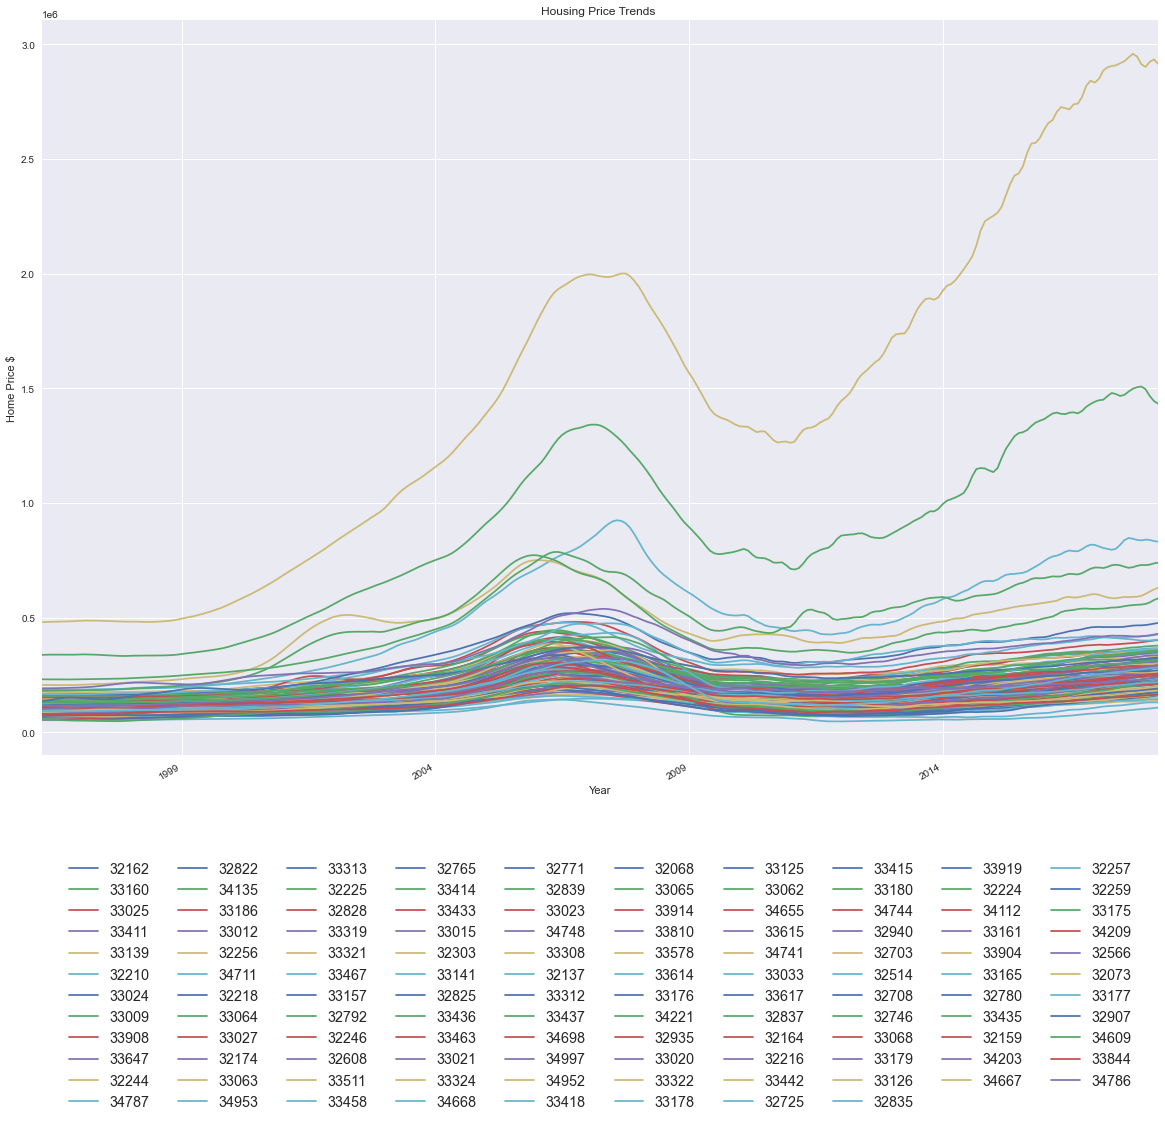

In [16]:
fl_df.plot(figsize=(20,15))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol= 10, fontsize = 'x-large')
plt.gcf().autofmt_xdate()

* It is clear that most of the zipcodes has low volatility, but there are some that have noticable trendiness. The downfall in period from 2007 - 2012 had occured due to economic crash in Great Recession period. According to IG.Ellen, one of the truly distinctive features of Great Recession is the severe housing crisis layered on top of all the labor market problems (G.Ellen, 2012).  
After 2012 the market started to recover. 

### Select after 2012

Since the fluctuation above can **significantly impact the models' performance and accuracy**, I will select **observations only after 2012.**

In [17]:
fl_df=fl_df.transpose()
fl_df.head()

,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,1996-11-01,1996-12-01,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01,1998-07-01,1998-08-01,1998-09-01,1998-10-01,1998-11-01,1998-12-01,1999-01-01,1999-02-01,1999-03-01,1999-04-01,1999-05-01,1999-06-01,1999-07-01,1999-08-01,1999-09-01,1999-10-01,1999-11-01,1999-12-01,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01
Zipcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32162,101000,100700,100400,100100,99800,99500,99200,98900,98600,98000,97100,95800,94300,92800,91500,90500,89800,89500,89300,89400,89800,90500,91500,92700,94100,95700,97200,98400,99400,100300,101200,102400,104000,106000,108300,110700,113200,115700,117900,119700,121200,122400,123400,123900,124100,124100,123800,123400,123100,123000,...,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
33160,337300,337900,338300,338400,338400,338200,338000,338000,338400,339100,339400,339000,338500,337900,337000,335900,334800,333800,333000,332400,332600,333300,333800,333900,334000,334100,334200,334300,334500,334900,335600,336600,338500,341000,343400,345500,347800,350200,352600,355100,357700,360600,363800,367500,372200,377600,382900,388200,393600,399000,...,1016000,1023400,1032400,1043400,1072200,1115700,1147800,1151900,1150200,1141400,1134200,1152000,1197200,1236200,1264200,1290500,1304300,1308200,1317500,1335100,1350100,1358200,1365200,1377400,1389700,1393600,1388400,1386800,1393400,1394800,1390500,1401200,1419300,1431100,1441200,1447700,1449600,1465500,1479400,1474400,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
33025,111600,111700,111800,111900,112000,112100,112200,112300,112500,112700,112800,112700,112600,112500,112300,112200,112100,112100,112200,112400,112800,113400,114000,114300,114600,114900,115000,115100,115100,115200,115200,115300,115500,115900,116200,116400,116600,116800,116900,117000,117100,117300,117500,117900,118600,119500,120600,121700,123200,124800,...,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
33411,126800,126800,126800,126800,126700,126700,126800,126800,127000,127100,127200,127100,127000,127100,127200,127600,128000,128600,129300,130100,131100,132000,132900,133400,133800,134100,134300,134500,134500,134500,134600,134600,134700,134800,135000,135100,135400,135800,136200,136700,137300,138000,138700,139500,140300,141300,142300,143000,143700,144300,...,216800,219400,222500,226600,230600,233100,234300,235800,237500,239100,240400,242200,245000,247600,249300,250600,251900,253300,255400,257900,260400,263600,266800,268600,269600,271100,273200,275100,276800,278800,280900,282900,284600,286400,288300,290100,291600,292800,29410

In [18]:
fl_df.columns.get_loc('2012-01-01')

189

In [19]:
fl_df.drop(fl_df.columns[:189], axis=1,inplace=True)
fl_df.head()

,2012-01-01,2012-02-01,2012-03-01,2012-04-01,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01
Zipcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32162,194300,194500,195300,196500,197900,199100,200000,200700,201600,202500,203600,204500,205100,205500,205900,206600,207800,209600,211500,213400,215200,217600,220300,223100,225400,227000,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
33160,857200,859700,861700,862900,866900,867400,860500,851300,848200,846200,848200,855800,866400,876200,886900,896700,907000,919100,928500,937600,952300,963000,963200,973900,994100,1009400,1016000,1023400,1032400,1043400,1072200,1115700,1147800,1151900,1150200,1141400,1134200,1152000,1197200,1236200,1264200,1290500,1304300,1308200,1317500,1335100,1350100,1358200,1365200,1377400,1389700,1393600,1388400,1386800,1393400,1394800,1390500,1401200,1419300,1431100,1441200,1447700,1449600,1465500,1479400,1474400,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
33025,161300,160600,159600,159400,160400,161200,161200,160300,160000,160000,160200,160400,160700,161400,163800,167500,170300,172100,173800,176700,179100,180300,181700,183200,183900,184800,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
33411,168300,168000,167900,168000,168600,168900,168500,168100,168200,168400,169400,171200,173200,175600,178200,181200,184700,188500,192400,196900,200900,204300,207200,209500,211600,214100,216800,219400,222500,226600,230600,233100,234300,235800,237500,239100,240400,242200,245000,247600,249300,250600,251900,253300,255400,257900,260400,263600,266800,268600,269600,271100,273200,275100,276800,278800,280900,282900,284600,286400,288300,290100,291600,292800,294100,295700,297400,299300,301400,303300,304900,307100,309800,311700,312600,313100
33139,1443900,1460300,1478600,1506500,1540000,1561600,1577100,1595200,1612700,1625300,1649900,1684400,1719900,1735000,1737900,1739200,1764100,1805200,1843700,1869900,1889500,1891800,1885700,1896600,1923400,1946400,1954400,1970500,1993600,2018700,2045300,2074500,2122900,2187500,2228000,2240400,2251600,2265500,2292100,2342700,2391200,2427000,2436500,2467500,2526100,2566900,2570100,2590900,2627200,2656400,2668800,2704600,2726200,2721300,2715800,2737800,2741200,2770600,2819400,2841100,2832700,2849300,2884900,2899400,2904700,2907900,2917100,2925700,2942400,2958300,2946300,2912900,2900900,2923300,2933600,2914100


# Exploration Analysis

## Minimum Capital

### Medium Price as Investment Capital

* To eliminate zipcodes with average price and below , I will calculate the **average house prices for 2018 (4 months) and use the median price as a required capital.**

In [20]:
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 32162 to 34786
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   2012-01-01 00:00:00  118 non-null    int64
 1   2012-02-01 00:00:00  118 non-null    int64
 2   2012-03-01 00:00:00  118 non-null    int64
 3   2012-04-01 00:00:00  118 non-null    int64
 4   2012-05-01 00:00:00  118 non-null    int64
 5   2012-06-01 00:00:00  118 non-null    int64
 6   2012-07-01 00:00:00  118 non-null    int64
 7   2012-08-01 00:00:00  118 non-null    int64
 8   2012-09-01 00:00:00  118 non-null    int64
 9   2012-10-01 00:00:00  118 non-null    int64
 10  2012-11-01 00:00:00  118 non-null    int64
 11  2012-12-01 00:00:00  118 non-null    int64
 12  2013-01-01 00:00:00  118 non-null    int64
 13  2013-02-01 00:00:00  118 non-null    int64
 14  2013-03-01 00:00:00  118 non-null    int64
 15  2013-04-01 00:00:00  118 non-null    int64
 16  2013-05-01 00:00:00  118 

In [21]:
avg_price = (fl_df['2018-01-01'] + fl_df['2018-02-01'] + 
             fl_df['2018-03-01'] + fl_df['2018-04-01']) / 4
avg_price.head()

Zipcode
32162     248975.0
33160    1459550.0
33025     295325.0
33411     311800.0
33139    2917975.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca78d0e588>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca5c33e208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca78d0e048>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca5c33e4a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca5c33e710>],
 'means': []}

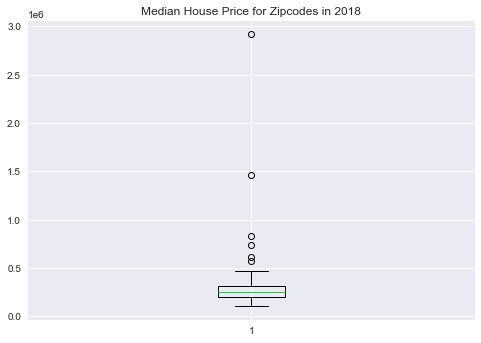

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('Median House Price for Zipcodes in 2018')
ax1.boxplot(avg_price)



* The boxplot shows that at some zipcodes **the median price for the house is extremly high**. I will drop those zipcodes from the dataset, since they **represent outliers.**

In [23]:
zipcodes = avg_price.index[avg_price > 500000].to_list()
zipcodes

['33160', '33139', '33141', '33308', '33062', '33180']

In [24]:
fl_df.drop(zipcodes, inplace=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 32162 to 34786
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   2012-01-01 00:00:00  112 non-null    int64
 1   2012-02-01 00:00:00  112 non-null    int64
 2   2012-03-01 00:00:00  112 non-null    int64
 3   2012-04-01 00:00:00  112 non-null    int64
 4   2012-05-01 00:00:00  112 non-null    int64
 5   2012-06-01 00:00:00  112 non-null    int64
 6   2012-07-01 00:00:00  112 non-null    int64
 7   2012-08-01 00:00:00  112 non-null    int64
 8   2012-09-01 00:00:00  112 non-null    int64
 9   2012-10-01 00:00:00  112 non-null    int64
 10  2012-11-01 00:00:00  112 non-null    int64
 11  2012-12-01 00:00:00  112 non-null    int64
 12  2013-01-01 00:00:00  112 non-null    int64
 13  2013-02-01 00:00:00  112 non-null    int64
 14  2013-03-01 00:00:00  112 non-null    int64
 15  2013-04-01 00:00:00  112 non-null    int64
 16  2013-05-01 00:00:00  112 

In [25]:
avg_price.drop(zipcodes, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca9d9b6e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca9d9b6e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca9d9b6a58>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca697e6a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca697e67f0>],
 'means': []}

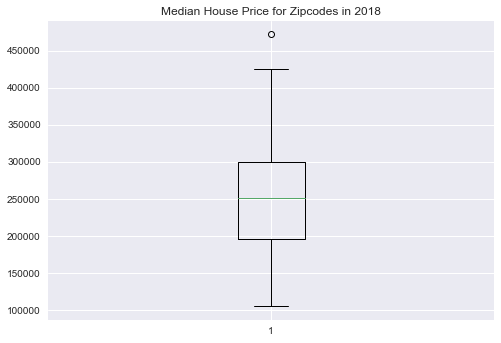

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Median House Price for Zipcodes in 2018')
ax1.boxplot(avg_price)


* The median house price for 4 months appears to be **\\$250,000.** To lower the threshold of entering the market, I will use **$200,000 as a minimum capital to invest.**
I will drop all zipcodes that have median price lower than \\$200,000

In [27]:
zipcodes = avg_price.index[avg_price > 300000].to_list()
fl_df.drop(zipcodes, inplace=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 32162 to 33844
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   2012-01-01 00:00:00  84 non-null     int64
 1   2012-02-01 00:00:00  84 non-null     int64
 2   2012-03-01 00:00:00  84 non-null     int64
 3   2012-04-01 00:00:00  84 non-null     int64
 4   2012-05-01 00:00:00  84 non-null     int64
 5   2012-06-01 00:00:00  84 non-null     int64
 6   2012-07-01 00:00:00  84 non-null     int64
 7   2012-08-01 00:00:00  84 non-null     int64
 8   2012-09-01 00:00:00  84 non-null     int64
 9   2012-10-01 00:00:00  84 non-null     int64
 10  2012-11-01 00:00:00  84 non-null     int64
 11  2012-12-01 00:00:00  84 non-null     int64
 12  2013-01-01 00:00:00  84 non-null     int64
 13  2013-02-01 00:00:00  84 non-null     int64
 14  2013-03-01 00:00:00  84 non-null     int64
 15  2013-04-01 00:00:00  84 non-null     int64
 16  2013-05-01 00:00:00  84 no

In [28]:
fl_df.head()

,2012-01-01,2012-02-01,2012-03-01,2012-04-01,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01
Zipcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32162,194300,194500,195300,196500,197900,199100,200000,200700,201600,202500,203600,204500,205100,205500,205900,206600,207800,209600,211500,213400,215200,217600,220300,223100,225400,227000,228200,229800,231600,233600,235700,237900,239500,240400,240900,241300,241800,242600,243400,244100,244400,244200,243900,244800,247600,250100,251000,251600,252000,252000,251400,250700,250200,249200,247900,246800,246400,246200,246600,246500,246600,247200,248100,248400,248700,249300,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
33025,161300,160600,159600,159400,160400,161200,161200,160300,160000,160000,160200,160400,160700,161400,163800,167500,170300,172100,173800,176700,179100,180300,181700,183200,183900,184800,185600,186100,187100,188800,191100,193800,195800,197500,199600,201900,204100,206600,209700,213200,216400,219300,222200,224800,226700,228200,230200,232300,234600,236300,237400,238300,240600,244000,247500,250600,254200,258000,261500,265200,269200,272500,275200,277900,279900,281300,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
32210,67600,66900,66900,66800,66500,66200,66400,66400,66200,66500,67100,67500,67400,67200,66800,66800,66800,66600,66000,65500,64800,64200,64000,64600,65600,66600,67100,67200,66600,65500,64900,65400,66600,67700,68500,68700,68600,68400,68400,69000,70500,72600,74600,76500,78200,80000,81400,82300,83100,84400,86700,89800,92400,94600,97100,98500,98800,99900,102000,104200,106600,109500,112000,113600,114900,115900,116900,118900,121200,122900,124700,127100,129400,130100,130200,130400
33024,130100,130100,130600,131400,132300,133000,133600,134000,134100,134100,134200,134900,135900,136800,138600,141400,144000,146800,149900,153300,155800,157500,159400,161400,162400,163600,165100,166100,167000,168600,170300,172000,173200,173800,174400,175700,177800,180700,182900,184500,186500,188600,190600,193200,196000,198400,200700,203000,205400,207300,209100,211700,215800,220000,223500,226400,229900,234000,237600,240500,243600,246100,247500,248600,250100,251600,253400,255400,257500,259800,261900,263700,265600,267800,269800,270900
33009,110800,110900,110100,108900,107900,107100,106200,105200,104100,102800,101700,101700,102600,103600,105400,109000,113500,117700,121100,124300,126600,127900,129400,131100,131700,132800,134600,136000,136900,138700,141400,143600,144400,144600,145100,145800,146600,147600,148700,149800,151100,151800,152200,153600,155900,158200,160900,163300,164800,166100,168200,170000,171900,174700,177700,180300,184100,189000,193600,198500,204200,209800,214900,219800,223700,226300,228900,231400,233600,236200,239000,241000,242600,245100,248100,250000


## Volatility

### Explore the Volatility of the Market

* To filter out the **zipcodes with average risk for investment**, I will **calculate the volatility of prices at each zipcode**. Goal is to extract zipcodes that have averagre volatility, since **low volatility** means **less returns** and **high volatility** might be **too risky.**

!!!!!!!!!!Since **before 2012 the market had a housing bubble** and that fluctuation might affect the volatility results, I will use observations **only after 2012 to investigate the volatility.** !!!!!!!!!!

In [29]:
#fl_df.columns.get_loc('2012-01-01')

In [30]:
# fl_df_2012 = fl_df.drop(fl_df.columns[:189], axis=1)
# fl_df_2012.head()

In [31]:
# fl_df=fl_df.transpose()
# fl_df.head()

* To calculate Historical Volatility, I will **use standart deviation of log returns**. First, I will need to **calculate historical ROI for each zipcode.**

In [32]:
def log_roi (df):
    
    hist_df = pd.DataFrame(columns = df.columns)
    
    for col in df.columns:
        hist_df[col] = (np.log(df[col]/df[col].shift(-12)))
    return hist_df
        
        

In [33]:
fl_df_vol = fl_df.transpose()

log_roi_1 = log_roi(fl_df_vol)
log_roi_1.head()

Zipcode,32162,33025,32210,33024,33009,33647,32244,32822,34711,32218,33064,32174,33063,34953,33313,32225,32828,33319,33321,32792,32246,32608,33511,32765,32303,32825,33436,33463,34668,32771,32839,33023,34748,32137,33312,34698,34997,34952,32068,33914,33810,33578,33614,34221,32935,33020,33322,33125,34655,33615,34741,33033,33617,32837,32164,32216,33442,32725,33415,34744,32940,32703,32514,32708,33068,33126,32835,33919,34112,33161,33904,32780,33435,32159,34203,34667,32257,34209,32566,32073,33177,32907,34609,33844
2012-01-01,-0.054094,0.003727,0.002963,-0.043616,0.076889,-0.015011,0.005851,-0.062867,-0.094020,-0.023882,-0.075676,-0.046338,-0.031772,-0.085506,-0.058472,0.019884,-0.079997,-0.035519,-0.050097,-0.026765,0.049211,0.018206,-0.025296,-0.064749,0.027302,-0.045894,-0.022701,-0.037059,-0.085418,0.002552,-0.071409,-0.050381,-0.016776,-0.084882,-0.060307,-0.052186,-0.080235,-0.039576,0.017508,-0.098135,-0.032416,-0.043646,-0.004068,-0.067718,-0.011201,-0.060334,-0.047704,0.001770,-0.064129,0.005152,-0.055236,-0.134341,-0.043768,-0.035634,-0.107262,0.079773,-0.111763,-0.079822,-0.060541,-0.088568,-0.085485,-0.011405,0.067352,-0.051262,-0.009852,-0.128857,-0.047546,-0.067455,-0.015680,-0.050227,-0.091652,-0.023500,-0.008563,-0.058589,-0.067555,-0.094751,-0.019595,-0.028113,-0.035304,0.065484,-0.118063,-0.100461,0.006257,-0.067804
2012-02-01,-0.055014,-0.004969,-0.004474,-0.050217,0.068092,-0.020460,-0.009412,-0.082407,-0.079275,-0.041922,-0.081543,-0.050726,-0.032308,-0.094401,-0.070350,0.006167,-0.091724,-0.041274,-0.068756,-0.048333,0.033638,0.023567,-0.032016,-0.079308,0.032588,-0.057293,-0.034507,-0.033100,-0.084728,-0.007624,-0.058676,-0.072130,-0.003717,-0.095038,-0.078165,-0.063274,-0.079090,-0.047253,0.010829,-0.094599,-0.043637,-0.057582,-0.025764,-0.071709,-0.028556,-0.061719,-0.059323,-0.017653,-0.069994,0.004137,-0.061998,-0.154337,-0.044766,-0.050195,-0.115565,0.065118,-0.113900,-0.083097,-0.078953,-0.097411,-0.092390,-0.035164,0.056200,-0.065637,-0.018529,-0.145836,-0.070505,-0.062539,-0.014646,-0.074300,-0.090326,-0.038037,-0.025689,-0.059034,-0.076430,-0.110901,-0.032148,-0.037458,-0.037470,0.073340,-0.126692,-0.103649,0.000000,-0.068844
2012-03-01,-0.052854,-0.025975,0.001496,-0.059453,0.043626,-0.028567,-0.012995,-0.095078,-0.067683,-0.047913,-0.100521,-0.050562,-0.039306,-0.106060,-0.090040,-0.010271,-0.104944,-0.040700,-0.090428,-0.074587,0.014586,0.018998,-0.042738,-0.095718,0.034289,-0.067862,-0.047924,-0.027270,-0.084049,-0.031082,-0.048654,-0.095404,-0.001842,-0.104615,-0.093510,-0.082444,-0.080990,-0.060557,-0.003322,-0.096283,-0.053832,-0.072953,-0.052751,-0.083600,-0.050597,-0.073272,-0.073691,-0.034908,-0.065875,0.002068,-0.060266,-0.160965,-0.037563,-0.063809,-0.117259,0.051293,-0.108085,-0.087598,-0.097111,-0.099241,-0.090799,-0.061875,0.037296,-0.086959,-0.030305,-0.151231,-0.103282,-0.063626,-0.020552,-0.086638,-0.094029,-0.036846,-0.054658,-0.055479,-0.089501,-0.111496,-0.041078,-0.053994,-0.043425,0.073404,-0.126771,-0.099091,-0.011561,-0.082355
2012-04-01,-0.050122,-0.049567,0.000000,-0.073347,-0.000918,-0.030730,-0.008279,-0.103085,-0.064377,-0.047723,-0.126041,-0.056826,-0.057570,-0.113364,-0.118021,-0.027231,-0.114554,-0.048838,-0.108830,-0.091586,-0.001708,0.006349,-0.050781,-0.105751,0.033454,-0.077438,-0.062483,-0.029042,-0.085454,-0.059061,-0.049734,-0.107714,-0.013693,-0.113249,-0.111132,-0.103554,-0.085582,-0.073366,-0.019901,-0.100869,-0.062250,-0.082060,-0.067230,-0.094320,-0.070934,-0.094340,-0.093249,-0.063486,-0.061798,-0.007228,-0.054888,-0.163028,-0.032828,-0.071765,-0.112795,0.035363,-0.111935,-0.097737,-0.112569,-0.094040,-0.087809,-0.082912,0.007843,-0.096966,-0.048215,-0.145590,-0.131458,-0.074758,-0.031135,-0.093288,-0.099607,-0.032876,-0.106880,-0.051260,-0.094899,-0.101487,-0.044882,-0.076342,-0.051910,0.062979,-0.125019,-0.090749,-0.025238,-0.099342
2012-05-01,-0.048814,-0.059891,-0.004501,-0.084741,-0.050598,-0.031506,-0.011807,-0.111094,-0.065577,-0.071176,-0.144997,-0.06

In [34]:
std_roi_1 = log_roi_1.std()

In [35]:
std_roi_1 = std_roi_1.to_frame(name = 'std')
std_roi_1.head()

,std
Zipcode,
32162,0.039247
33025,0.034167
32210,0.107179
33024,0.034390
33009,0.077993


In [36]:
def annual_std(df):
    
    annual_df = pd.DataFrame(columns = ['annual_std', 'volatility'], index = df.index)
    
    for ind in df.index:
        #print(df['Name'][ind], df['Stream'][ind])
        annual_df.loc[[ind],['annual_std']] = df['std'][ind] * 12 **.5
        annual_df.loc[[ind],['volatility']] = round(df['std'][ind] * 12 **.5, 4)*100
    
    
    return annual_df

In [37]:
annual_s = annual_std(std_roi_1)
annual_s.head(10)

,annual_std,volatility
Zipcode,,
32162,0.135956,13.6
33025,0.118356,11.84
32210,0.37128,37.13
33024,0.119131,11.91
33009,0.270175,27.02
33647,0.0705815,7.06
32244,0.162018,16.2
32822,0.157663,15.77
34711,0.0777003,7.77


{'whiskers': [<matplotlib.lines.Line2D at 0x7fca698415c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca69841b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca69841358>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca69847160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca69847438>],
 'means': []}

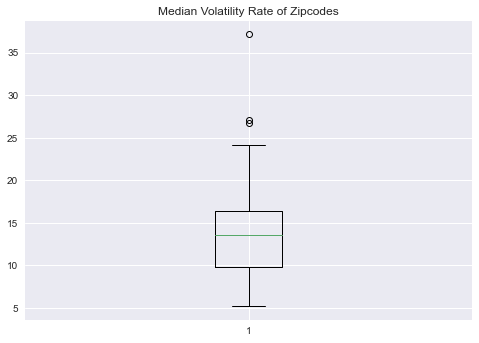

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Median Volatility Rate of Zipcodes')
ax1.boxplot(annual_s['volatility'])



* The graph shows that the **median value for volatility rate is around 1.7**. I will **keep zipcodes with volatility rate of 1.7-2.9.** based on project assumptions.

In [39]:
zipcodes = annual_s.index[(annual_s['volatility'] <13) | (annual_s['volatility'] >24)].to_list()
fl_df.drop(zipcodes, inplace=True)

In [40]:
len(fl_df)

43

## ROI of 12 Months

### Calculate the ROI for the last 12 months

For the purpose of the project, I will calculate the **average 12 months ROI percentage** of each zipcode, in order to find **zipcodes that have highest return.**

In [41]:
roi = ((fl_df['2018-04-01'] - fl_df['2017-04-01'])/fl_df['2017-04-01']) * 100
roi.sort_values(ascending=False)

Zipcode
32839    23.437500
33020    19.830827
33313    18.564103
33023    17.964946
33064    17.718191
33615    17.126100
33068    16.950053
33435    16.413868
34667    15.886525
33319    14.675592
32822    13.793103
32907    13.750000
33415    13.396005
33614    13.337508
32073    13.162820
32935    12.670300
33161    12.282061
33617    11.824539
33463    11.697575
33312    11.334474
32703    11.024063
34609    10.439921
32216    10.386965
32244    10.159652
32771     9.768908
33125     9.059368
32246     8.882682
32514     8.577878
34744     8.565737
34741     8.041112
33126     7.753336
32828     7.429421
33063     7.382283
32835     6.925323
32792     6.658076
32303     6.536965
32225     5.810259
32765     5.658324
33436     5.373574
34112     4.128114
33919     3.469545
33914     3.183792
32162     1.368760
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca5c3542e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca5c354898>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca5c354080>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca5c354e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca5c35ac88>],
 'means': []}

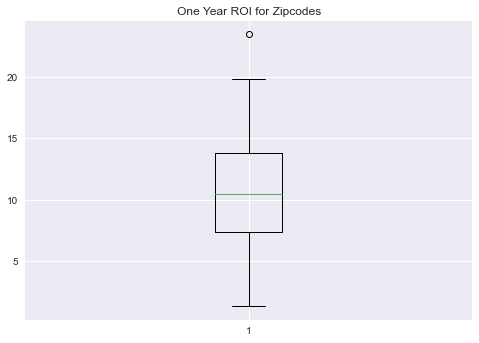

In [42]:
#roi.plot(style='.', figsize=(20,15))
fig1, ax1 = plt.subplots()
ax1.set_title('One Year ROI for Zipcodes')
ax1.boxplot(roi)


* The **median ROI** for the last 24 months of all zipcodes in Florida is **11%**, but since the project goal is to find best zipcodes to invest in, I will focus on those zipcodes, that have **return rate higher than upper quantile,** which is 13.5%

In [43]:
zipcodes = roi.index[roi <13.5].to_list()
fl_df.drop(zipcodes, inplace=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 32822 to 32907
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   2012-01-01 00:00:00  12 non-null     int64
 1   2012-02-01 00:00:00  12 non-null     int64
 2   2012-03-01 00:00:00  12 non-null     int64
 3   2012-04-01 00:00:00  12 non-null     int64
 4   2012-05-01 00:00:00  12 non-null     int64
 5   2012-06-01 00:00:00  12 non-null     int64
 6   2012-07-01 00:00:00  12 non-null     int64
 7   2012-08-01 00:00:00  12 non-null     int64
 8   2012-09-01 00:00:00  12 non-null     int64
 9   2012-10-01 00:00:00  12 non-null     int64
 10  2012-11-01 00:00:00  12 non-null     int64
 11  2012-12-01 00:00:00  12 non-null     int64
 12  2013-01-01 00:00:00  12 non-null     int64
 13  2013-02-01 00:00:00  12 non-null     int64
 14  2013-03-01 00:00:00  12 non-null     int64
 15  2013-04-01 00:00:00  12 non-null     int64
 16  2013-05-01 00:00:00  12 no

In [44]:
fl_df = fl_df.transpose()
fl_df.head()

Zipcode,32822,33064,33313,33319,32839,33023,33020,33615,33068,33435,34667,32907
2012-01-01,78600,86500,93000,96800,68900,98700,101300,97300,90900,81400,97600,75700
2012-02-01,78000,87100,93300,97300,69500,97600,102100,96900,90900,80700,97200,76000
2012-03-01,78200,87000,93400,98700,70200,96900,102600,96800,91000,80100,97500,76800
2012-04-01,79200,87100,93400,99900,70600,97600,103100,96500,91100,78900,98300,77900
2012-05-01,80000,87800,93800,100300,71600,98900,103700,96300,91100,77700,99500,78600


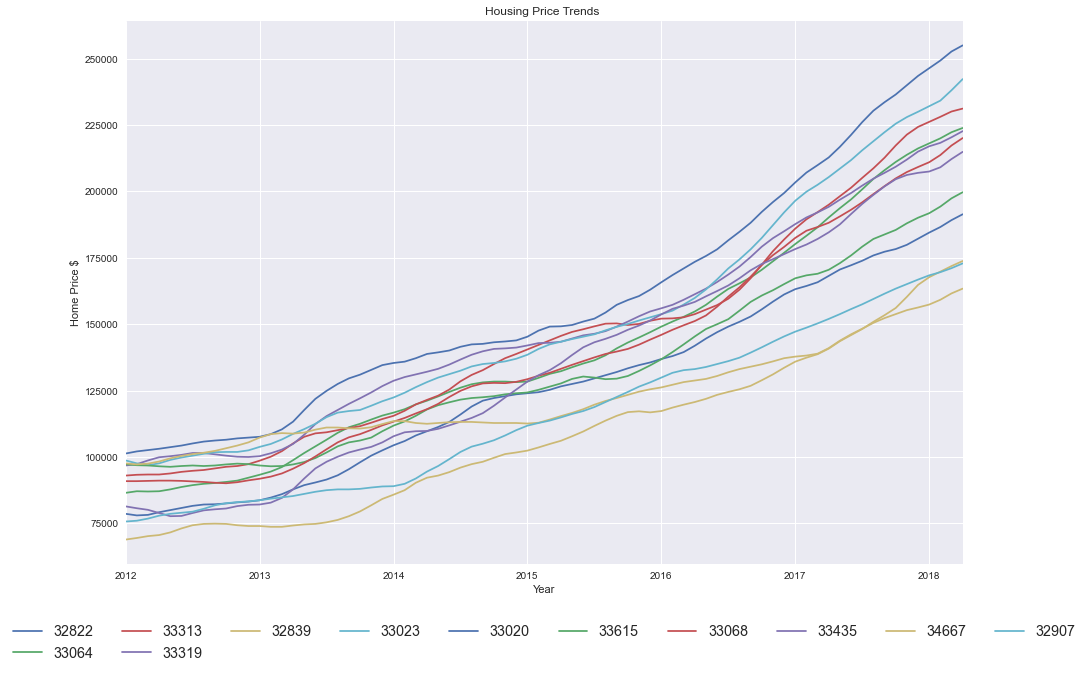

In [45]:
fl_df.plot(figsize=(15,10))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')
#plt.gcf().autofmt_xdate()

### Summary:

The datast had been cleaned out and filtered down as follows:
* Zipcodes of **Florida State** had been selected
* Zipcodes with **urbanization rank** in **top 15 quantile**
* The **minimum median price of housing is \\$200,000** for the last 4 months
* The **volatility range** of the median price is **1.7 - 2.9**
* The **ROI rate is greater than 9.5%**

The initial **amount of zipcodes** was reduced **from 14723 to 14.**

# Data Preparation

* Before proceeding to modeling I will check the **data stationarity and autocorrelation of the prices.**

## Stationarity of Data

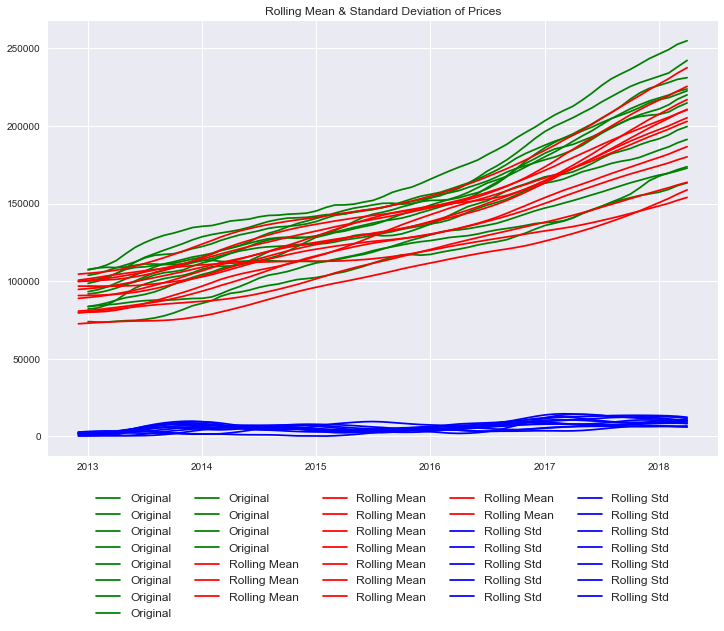

In [46]:
tsf.stationarity_test(fl_df, 12)

In [47]:
tsf.dickey_fuller_test(fl_df) # function stored in time_series_funtion file

,test_stats,pvalue,usedlag,num_of_obs,crit_val_10%
Zipcode,,,,,
32822,0.996826,0.994232,3,72,-2.588679
33064,0.745817,0.990709,4,71,-2.588995
33313,1.082558,0.995065,4,71,-2.588995
33319,1.252228,0.996328,4,71,-2.588995
32839,2.316535,0.998965,4,71,-2.588995
33023,2.656804,0.999084,2,73,-2.588371
33020,0.620472,0.988110,12,63,-2.591897
33615,1.908529,0.998542,11,64,-2.591493
33068,1.067597,0.994930,5,70,-2.589320


* As the **Dickey- Fuller Test** shows, none of the **zipcodes'** data **do not meet stationarity assumption**. I will build the autocorrelation and partial autocorrelation graphs, and try different transformation merhods to **modify data before modeling.**

## Non Stationary to Stationary

### Differencing

* For now, I will work with 3 zipcodes and try **different methods to transform data to stationary**. After finding most suited method, I will use it on all zipcodes and **check if the stationarity assumption is met.**

## ACF and PACF

Autocorrelation and Partial Autocorrelation functions might help to identify the level of differencing.

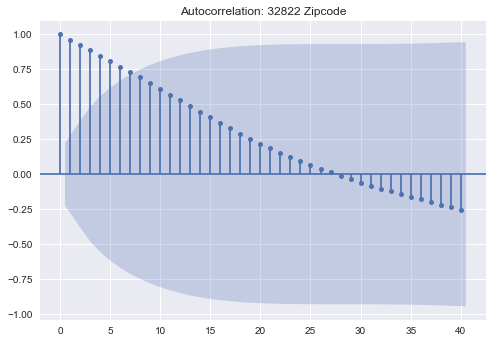

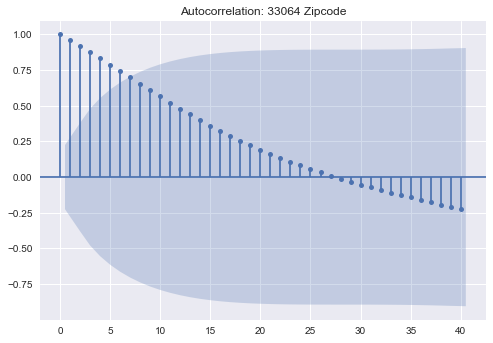

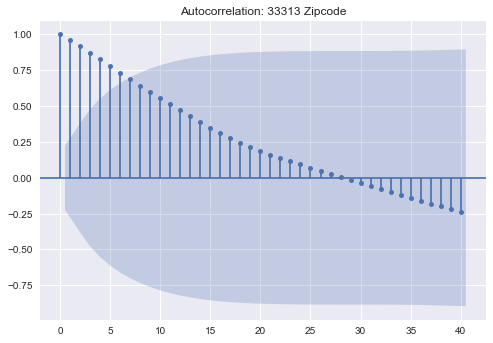

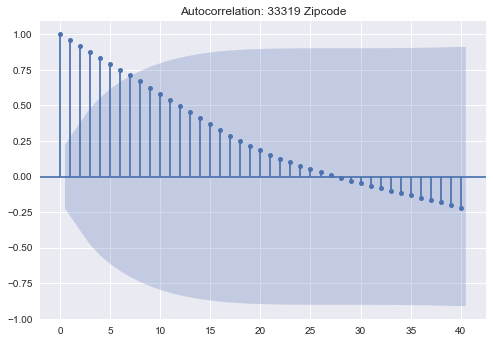

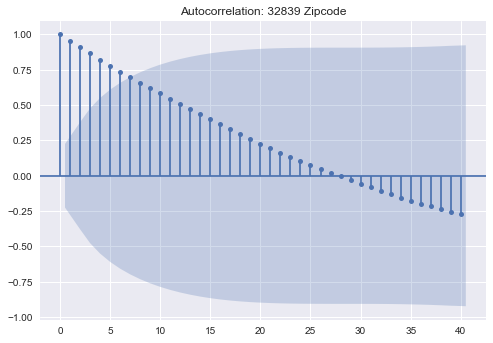

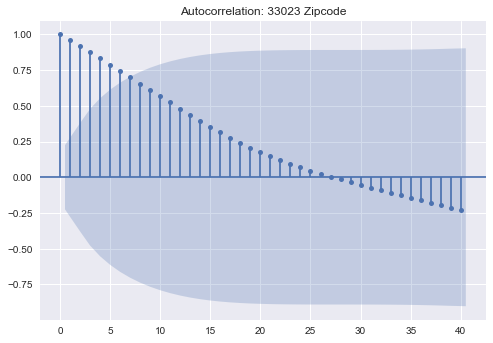

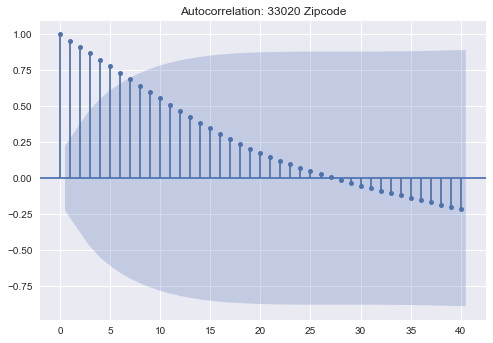

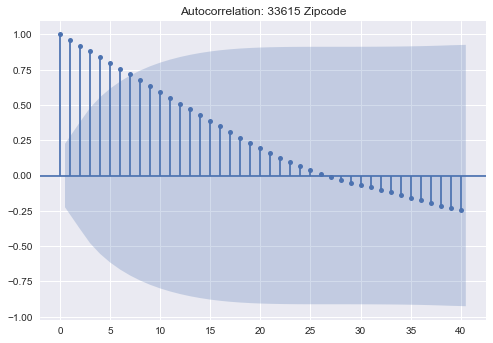

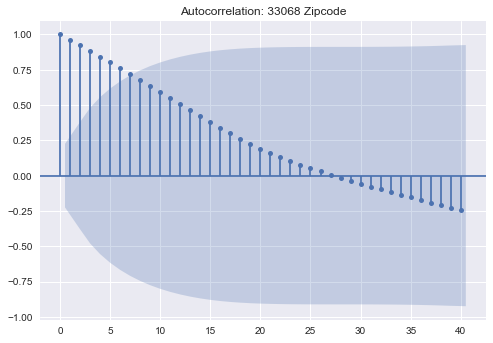

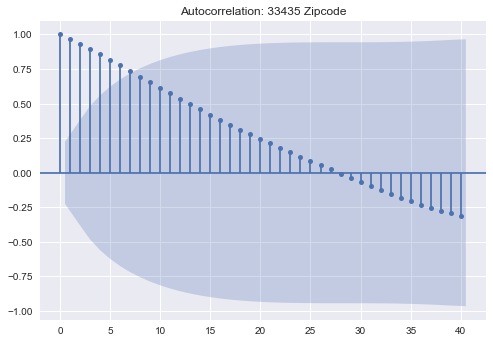

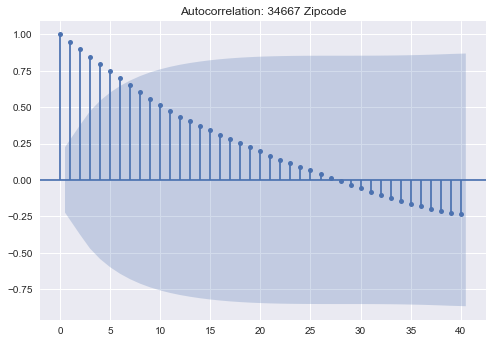

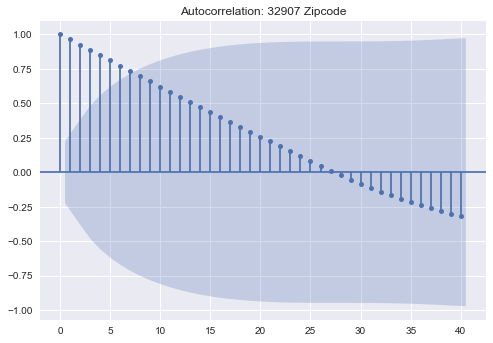

In [48]:
#plt.figure(figsize=(12,6))

for col in fl_df.columns:
    title = 'Autocorrelation: '+ col + ' Zipcode'
    lags = 40
    plot_acf(fl_df[col],title=title,lags=lags)
    #plt.figure(figsize=(15,3))
    #pd.plotting.autocorrelation_plot(df_final[col]);

The graphs show that the **median prices** of houses are **significantly correlated for first 6 lags** for most of the zipcodes. This means that to make data stationary the level of differencing should be high enough.

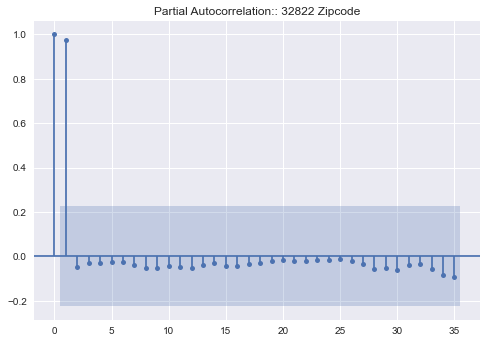

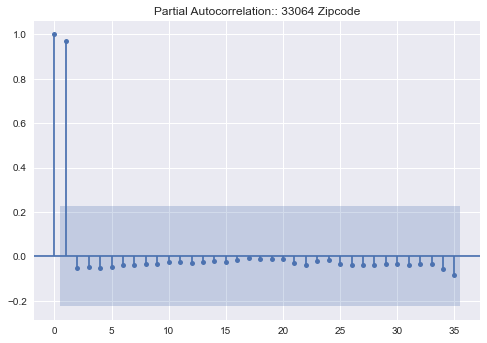

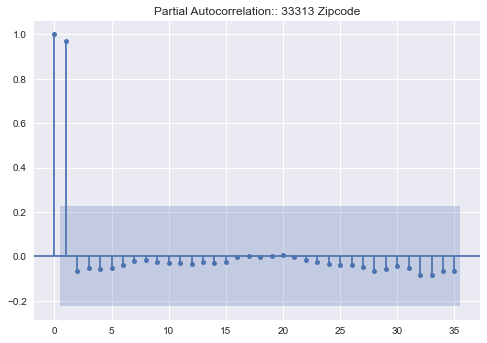

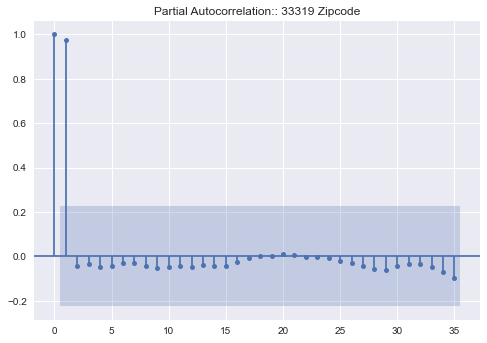

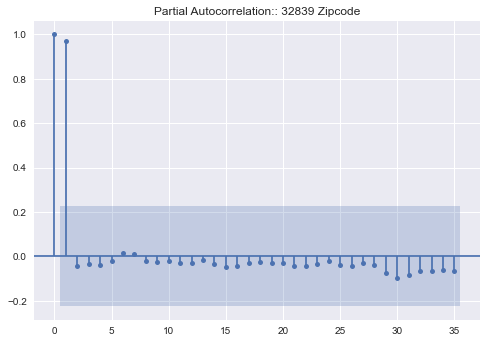

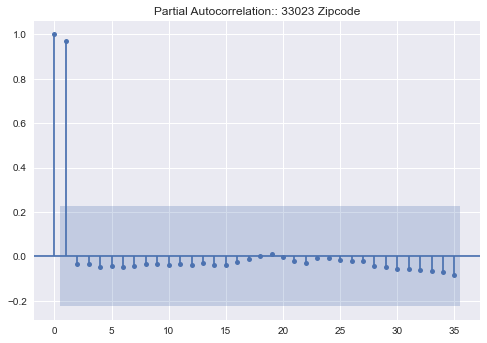

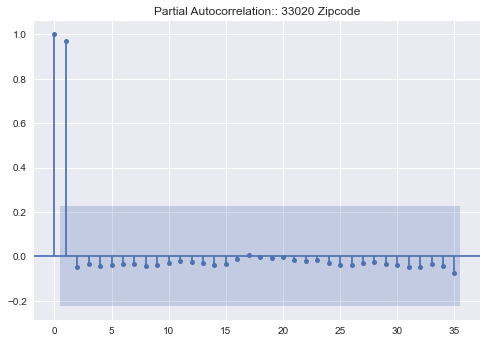

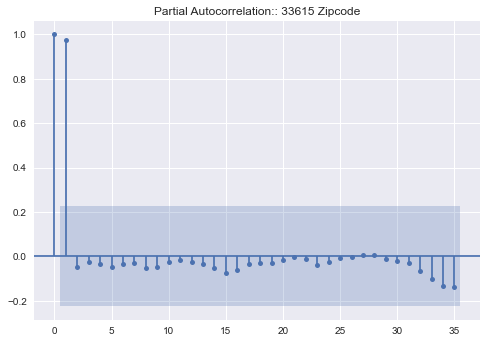

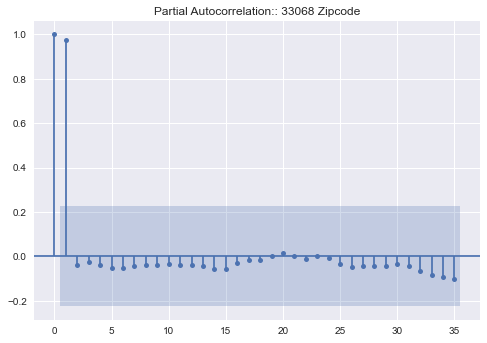

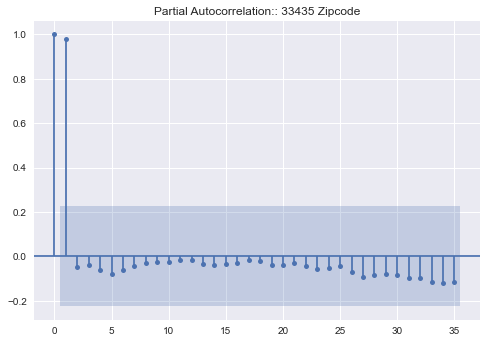

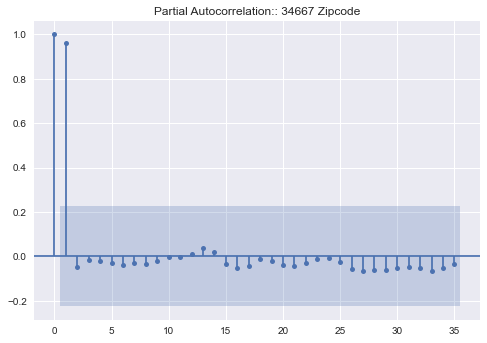

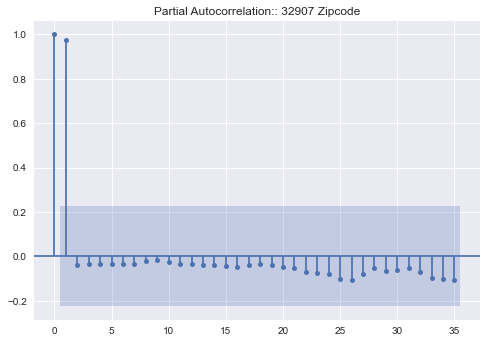

In [49]:
for col in fl_df.columns:
    title = 'Partial Autocorrelation:: '+ col + ' Zipcode'
    lags = 35
    plot_pacf(fl_df[col],title=title,lags=lags)


In [50]:
tsf.find_best_difference(fl_df[['33064', '33313', '33319']], 6) # function stored in time_series_funtion file

33064 Zipcode
          test_stats    pvalue  usedlag  num_of_obs  crit_val_10%
diff_lvl                                                         
1          -2.249482  0.188779        3          71     -2.588995
2          -2.342215  0.158714        7          66     -2.590724
3          -1.589106  0.489064       10          62     -2.592314
4          -2.697203  0.074524        5          66     -2.590724
5          -2.029512  0.273785       11          59     -2.593652
33313 Zipcode
          test_stats    pvalue  usedlag  num_of_obs  crit_val_10%
diff_lvl                                                         
1          -2.772763  0.062271        3          71     -2.588995
2          -1.911667  0.326593       10          63     -2.591897
3          -2.219198  0.199352        6          66     -2.590724
4          -2.257063  0.186190        7          64     -2.591493
5          -2.181807  0.212915       12          58     -2.594129
33319 Zipcode
          test_stats    pvalue  us

* The function above shows dickey fuller test results for 5 periods of differencing. It is clear that none of zipcode datasets becomes stationary within 5 levels of differencing. Next, I will work with **log transformation.**

### Log transform

In [51]:
three_zips = np.log(fl_df[['33064', '33313', '33319']].dropna())

In [52]:
tsf.dickey_fuller_test(three_zips)

,test_stats,pvalue,usedlag,num_of_obs,crit_val_10%
Zipcode,,,,,
33064,-0.181262,0.940719,4,71,-2.588995
33313,0.363376,0.980072,4,71,-2.588995
33319,-0.261569,0.930774,7,68,-2.590001


* Log transformation **didn't** appear to **make the data stationary**, since the critical value assumption is not met by any zipcode.

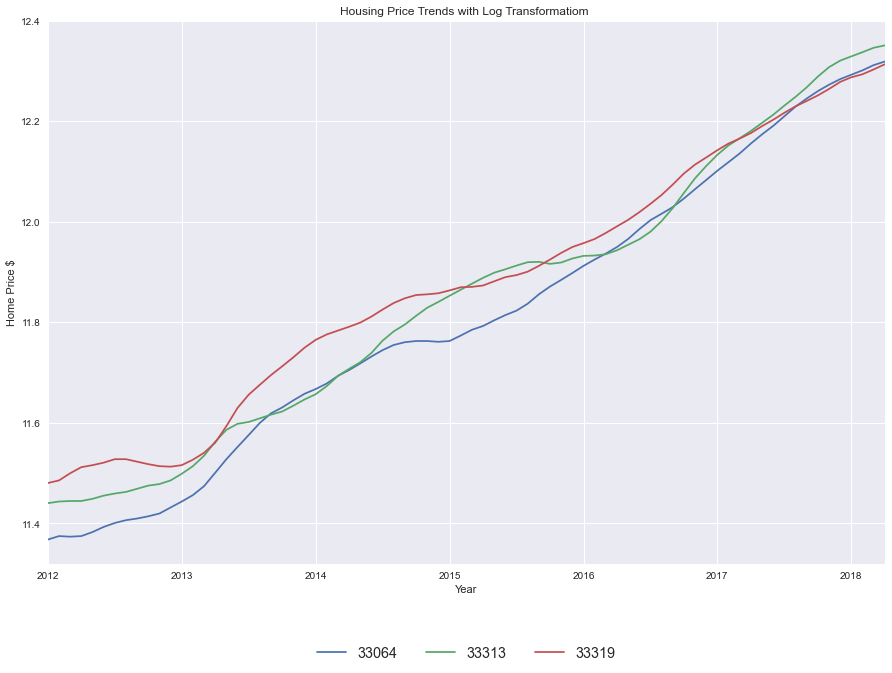

In [53]:
three_zips.plot(figsize=(15,10))
plt.title("Housing Price Trends with Log Transformatiom ")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')

### Differencing logg transformed zipcodes

In [54]:
tsf.find_best_difference(three_zips.dropna(), 6)

33064 Zipcode
          test_stats    pvalue  usedlag  num_of_obs  crit_val_10%
diff_lvl                                                         
1          -2.894760  0.045961        3          71     -2.588995
2          -3.278601  0.015863        5          68     -2.590001
3          -2.694677  0.074964       12          60     -2.593190
4          -3.545128  0.006901        5          66     -2.590724
5          -3.787573  0.003037       11          59     -2.593652
33313 Zipcode
          test_stats    pvalue  usedlag  num_of_obs  crit_val_10%
diff_lvl                                                         
1          -3.438426  0.009717        3          71     -2.588995
2          -2.482959  0.119676       10          63     -2.591897
3          -2.944534  0.040409        8          64     -2.591493
4          -2.898407  0.045534        9          62     -2.592314
5          -3.508544  0.007770        6          64     -2.591493
33319 Zipcode
          test_stats    pvalue  us

* As it's seen above, **differencing on log trnsformed data works on those three zipcodes**. The critical value and pvalue **assumptions are met.**

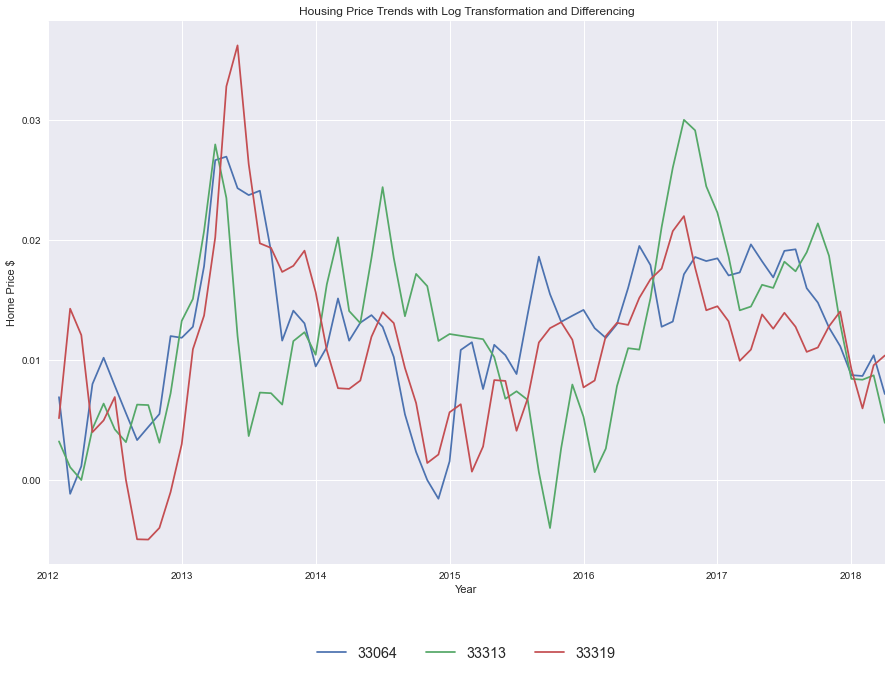

In [55]:
three_zips.diff().plot(figsize=(15,10))
plt.title("Housing Price Trends with Log Transformation and Differencing")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')

## Transformation of Whole Dataset

* Now, I will try to use **differencing log transformation** on whole dataset. 

In [56]:
diff_df = np.log(fl_df).dropna()
tsf.dickey_fuller_test(diff_df.diff().dropna())

,test_stats,pvalue,usedlag,num_of_obs,crit_val_10%
Zipcode,,,,,
32822,-2.672616,0.078898,2,72,-2.588679
33064,-2.894760,0.045961,3,71,-2.588995
33313,-3.438426,0.009717,3,71,-2.588995
33319,-3.647088,0.004922,6,68,-2.590001
32839,-3.304846,0.014663,3,71,-2.588995
33023,-2.640407,0.084930,3,71,-2.588995
33020,-2.630505,0.086855,12,62,-2.592314
33615,-2.467773,0.123514,4,70,-2.589320
33068,-3.425365,0.010124,3,71,-2.588995


 * **9 zipcodes have met the critical value assumption**, but **only 6 out of 12 zipcodes** have **met the p-value parameter**. I will transform all zipcodes that met both assumptions and explore the other transformatiom methods for the rest of data.

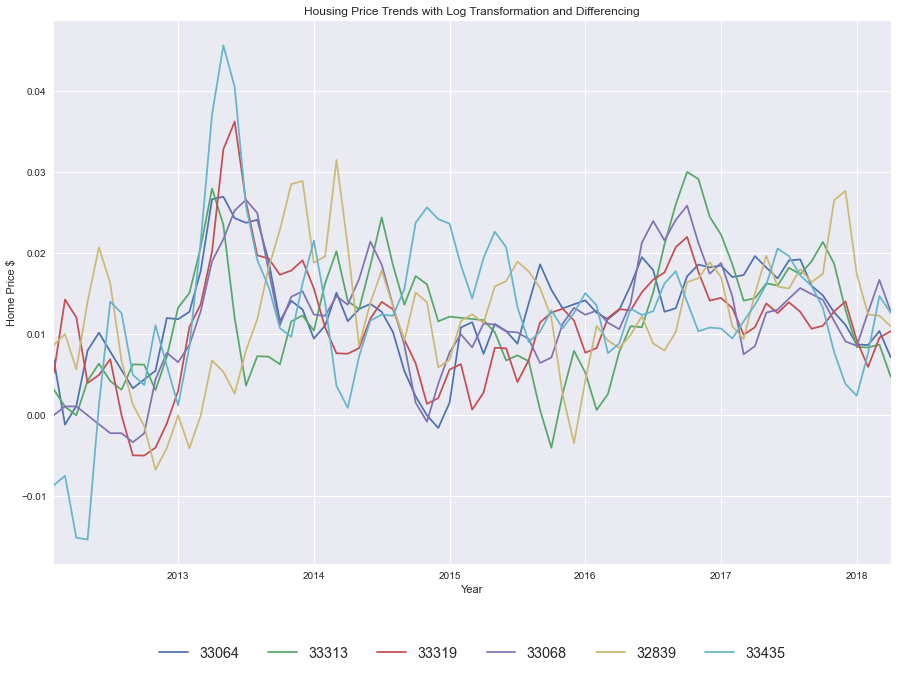

In [57]:
log_dif_df = np.log(fl_df[['33064', '33313', '33319', '33068','32839', '33435']]).diff().dropna()

log_dif_df.plot(figsize=(15,10))
plt.title("Housing Price Trends with Log Transformation and Differencing")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')

### Log Transform and Differencing Levels

* I will log transform the rest of the zip codes and see whaich level of differencing would work on that data.

In [58]:
rest_df = np.log(fl_df[['32822', '33023', '33020', '33615', '34667', '32907']]).dropna()
tsf.find_best_difference(rest_df.dropna(), 13)

32822 Zipcode
          test_stats    pvalue  usedlag  num_of_obs  crit_val_10%
diff_lvl                                                         
1          -2.672616  0.078898        2          72     -2.588679
2          -2.386178  0.145676        7          66     -2.590724
3          -3.725401  0.003770        9          63     -2.591897
4          -3.200132  0.019977        8          63     -2.591897
5          -3.693502  0.004205       11          59     -2.593652
6          -3.579285  0.006170        7          62     -2.592314
7          -3.317033  0.014134        8          60     -2.593190
8          -3.933649  0.001801       11          56     -2.595137
9          -4.258510  0.000524        6          60     -2.593190
10         -3.762080  0.003320       11          54     -2.596222
11         -3.314420  0.014246        9          55     -2.595670
12         -4.678152  0.000092        9          54     -2.596222
33023 Zipcode
          test_stats    pvalue  usedlag  num_of_

* As the table shows, the zipcodes **32822, 33020** meet critical value and pvalue assumptions with **third level of differencing on logged data**. And zipcode **33615** meets assumptions on **level 2 differencing**. As for the rest of zipcodes, I will try second order differencing.

In [59]:
log_dif_df = log_dif_df.join(np.log(fl_df[['32822', '33020']]).diff(3))
log_dif_df = log_dif_df.join(np.log(fl_df['33615']).diff(2))

log_dif_df.head()

,33064,33313,33319,33068,32839,33435,32822,33020,33615
2012-02-01,0.006912,0.003221,0.005152,0.000000,0.008671,-0.008637,NaN,NaN,NaN
2012-03-01,-0.001149,0.001071,0.014286,0.001100,0.010022,-0.007463,NaN,NaN,-0.005152
2012-04-01,0.001149,0.000000,0.012085,0.001098,0.005682,-0.015095,0.007605,0.017613,-0.004137
2012-05-01,0.008005,0.004274,0.003996,0.000000,0.014065,-0.015326,0.025318,0.015549,-0.005179
2012-06-01,0.010198,0.006376,0.004973,-0.001098,0.020733,0.001286,0.032707,0.016433,0.001036


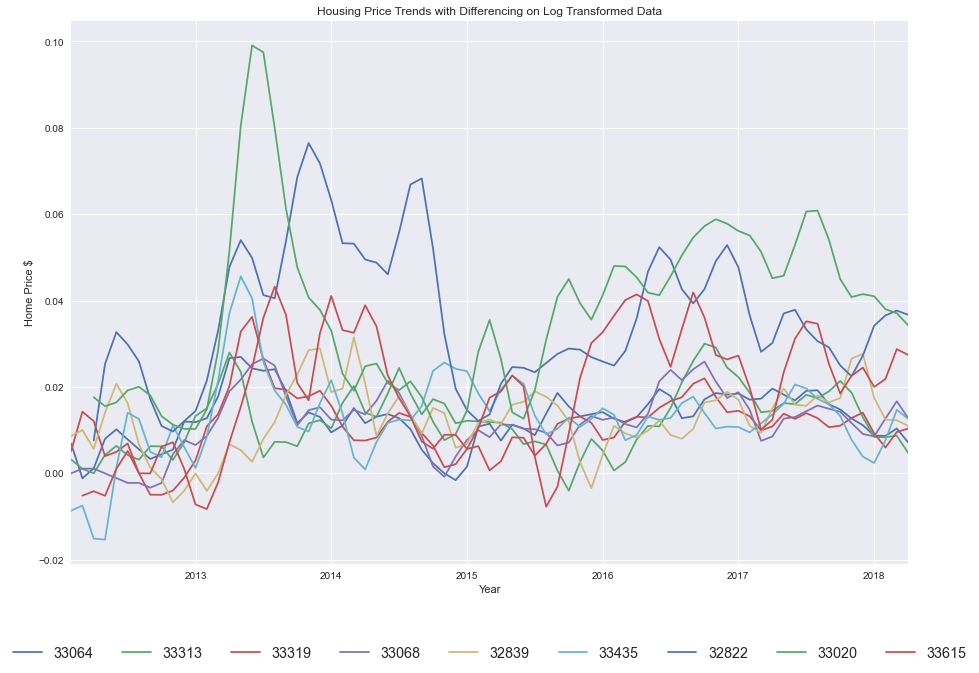

In [60]:
log_dif_df.plot(figsize=(15,10))
plt.title("Housing Price Trends with Differencing on Log Transformed Data")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')

### Second Order Differencing Rest of Data

In [61]:
rest_df = fl_df[['33023', '34667', '32907']].diff().diff().dropna()
tsf.dickey_fuller_test(rest_df)

,test_stats,pvalue,usedlag,num_of_obs,crit_val_10%
Zipcode,,,,,
33023,-7.078582,4.730920e-10,1,72,-2.588679
34667,-10.539921,8.703528e-19,1,72,-2.588679
32907,-3.711896,3.948908e-03,9,64,-2.591493


* The **second order differencing of data without log transforming** worked for the rest of the data.

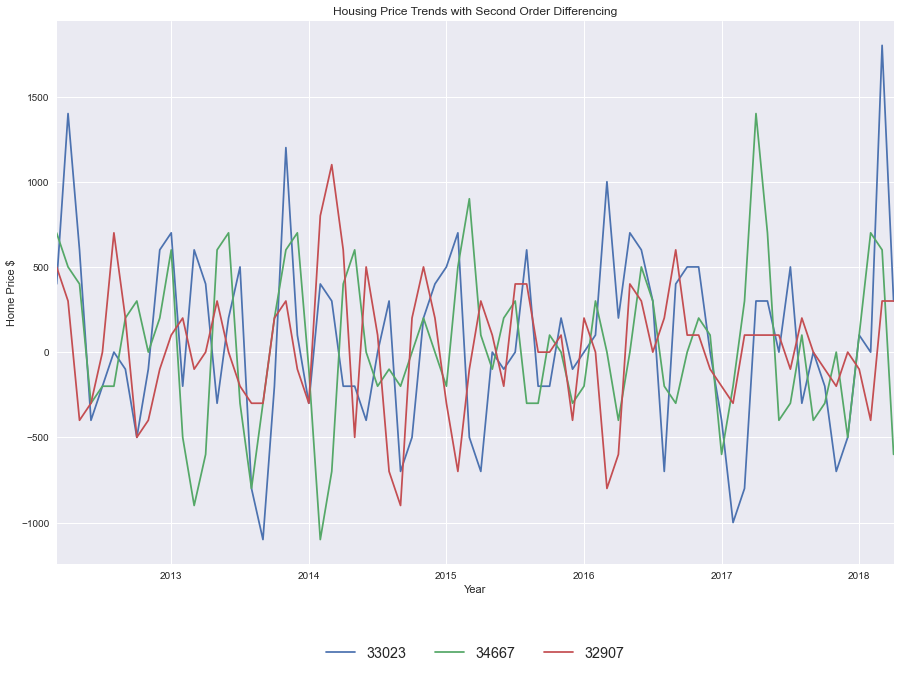

In [62]:
rest_df.plot(figsize=(15,10))
plt.title("Housing Price Trends with Second Order Differencing")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')

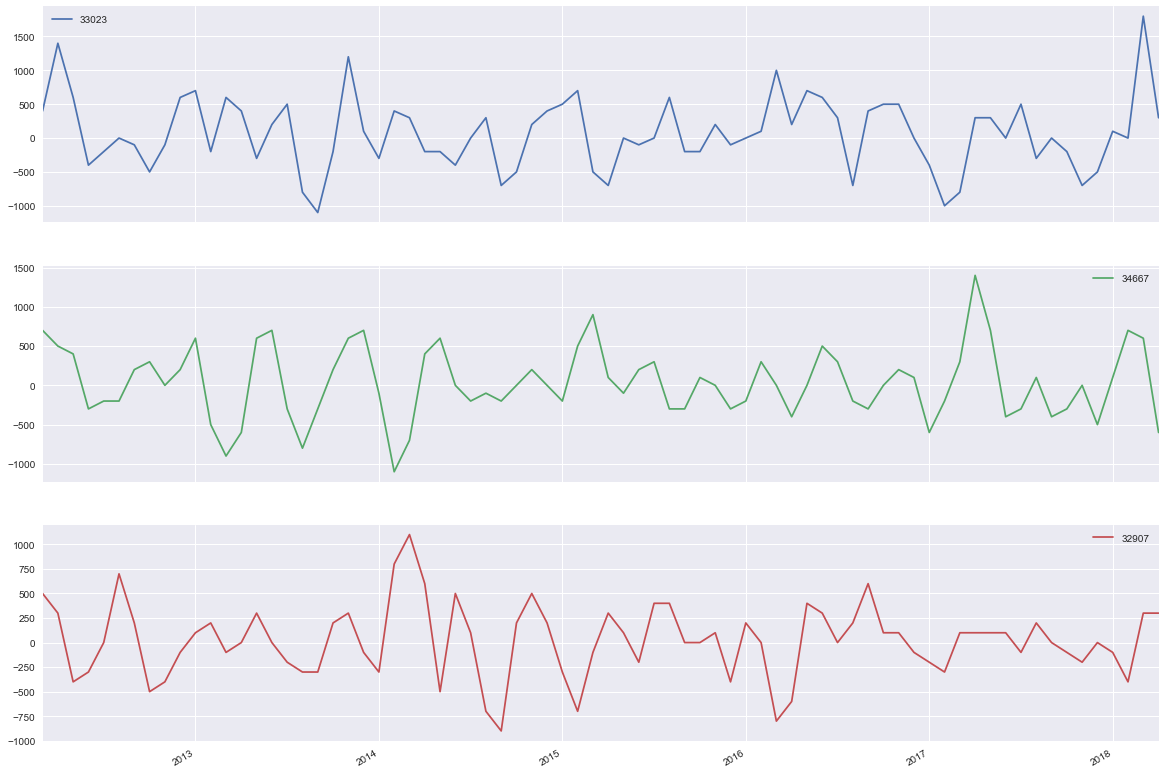

In [63]:
rest_df.plot(figsize = (20,15), subplots=True, legend=True)
plt.show()

### Drop Missing Values

* I will drop observations with missing values for both dataframes: **log_dif_df and rest_df**

In [64]:
log_dif_df.dropna(inplace = True)
rest_df.dropna(inplace = True)
log_dif_df.head()

,33064,33313,33319,33068,32839,33435,32822,33020,33615
2012-04-01,0.001149,0.000000,0.012085,0.001098,0.005682,-0.015095,0.007605,0.017613,-0.004137
2012-05-01,0.008005,0.004274,0.003996,0.000000,0.014065,-0.015326,0.025318,0.015549,-0.005179
2012-06-01,0.010198,0.006376,0.004973,-0.001098,0.020733,0.001286,0.032707,0.016433,0.001036
2012-07-01,0.007861,0.004228,0.006920,-0.002200,0.016283,0.014040,0.029853,0.019213,0.005179
2012-08-01,0.005577,0.003160,0.000000,-0.002205,0.006707,0.012595,0.025911,0.020048,0.000000


## ACF and PACF

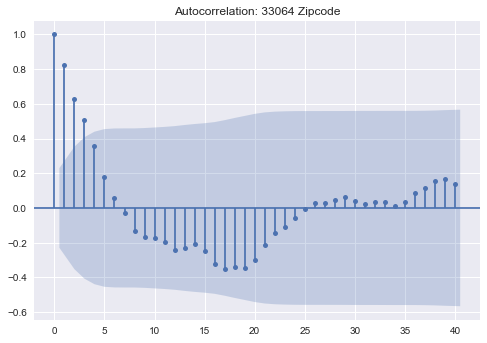

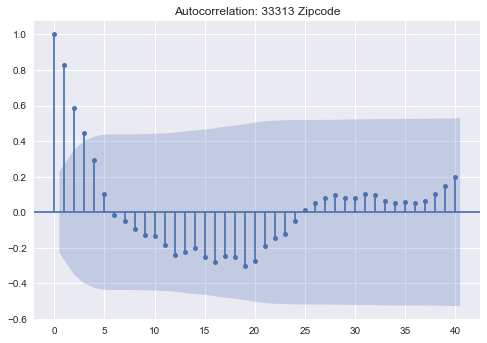

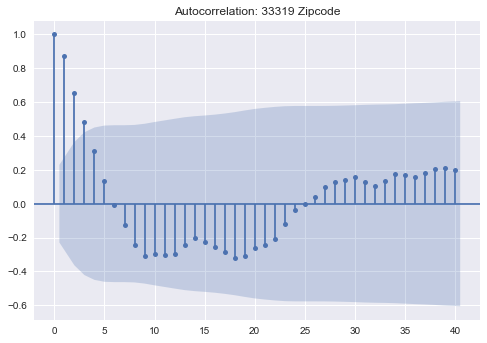

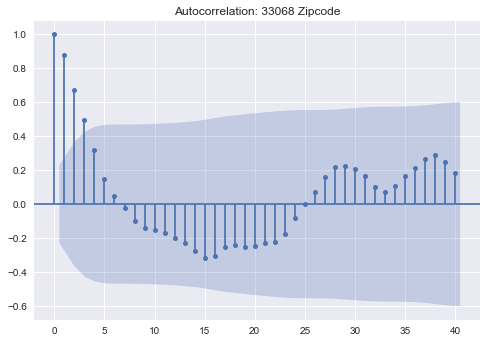

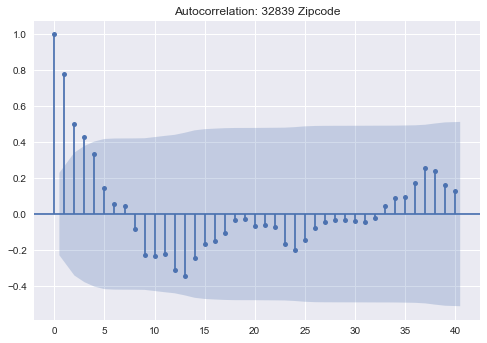

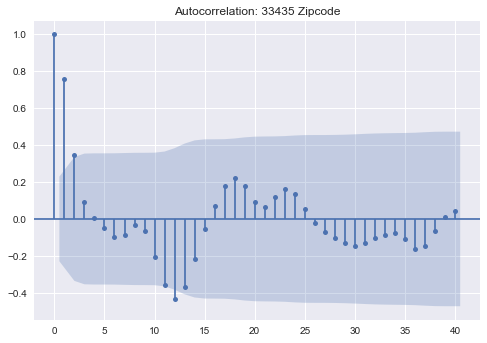

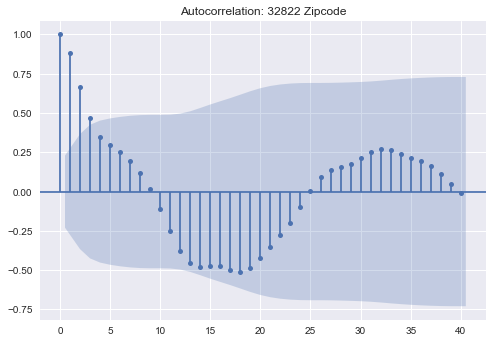

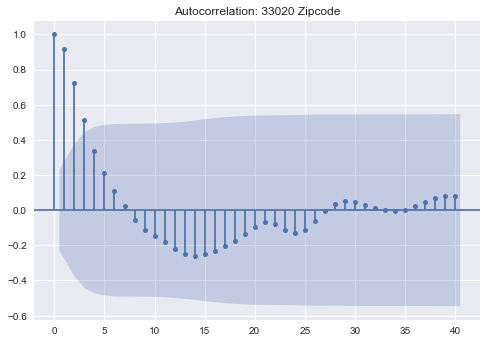

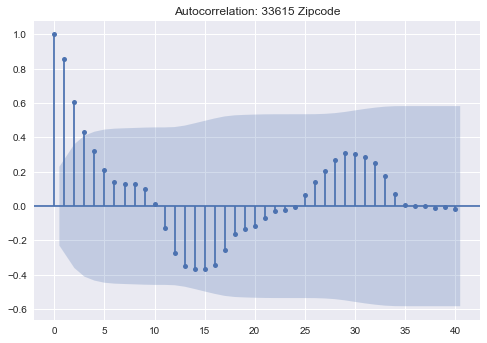

In [65]:
# ACF for log differenced data

for col in log_dif_df.columns:
    title = 'Autocorrelation: '+ col + ' Zipcode'
    lags = 40
    plot_acf(log_dif_df[col],title=title,lags=lags)
    #plt.figure(figsize=(15,3))
    #pd.plotting.autocorrelation_plot(df_final[col]);

The graphs show that the **median prices** of houses are **significantly correlated for the first 2-3 lags**. 

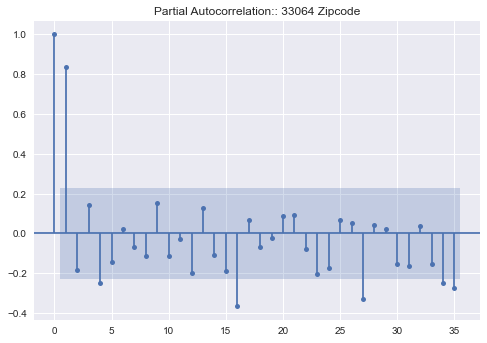

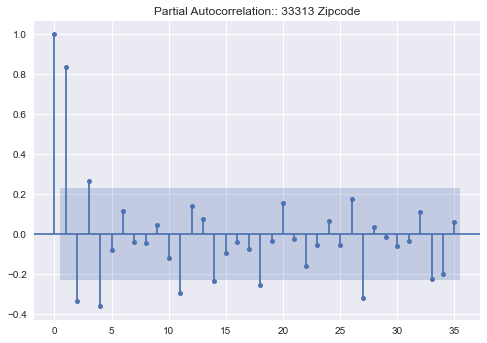

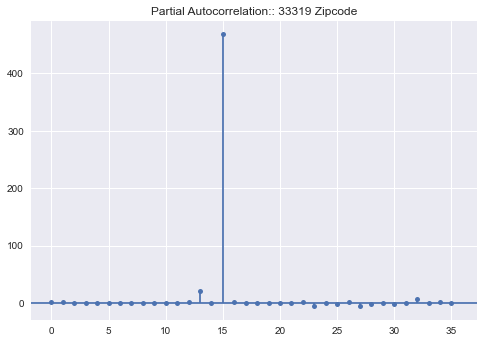

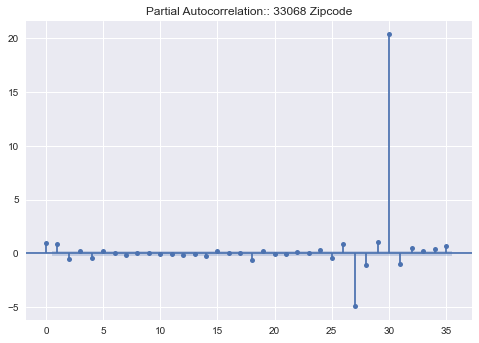

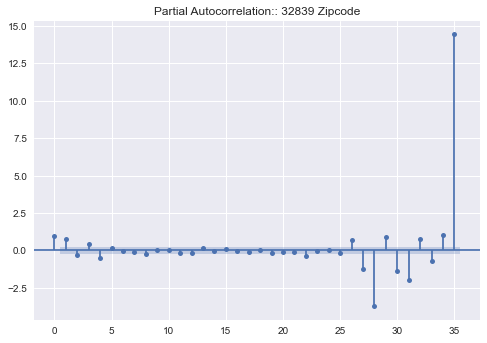

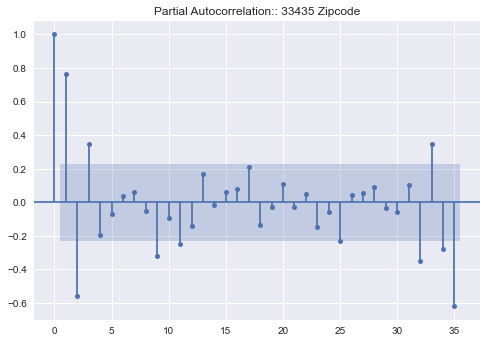

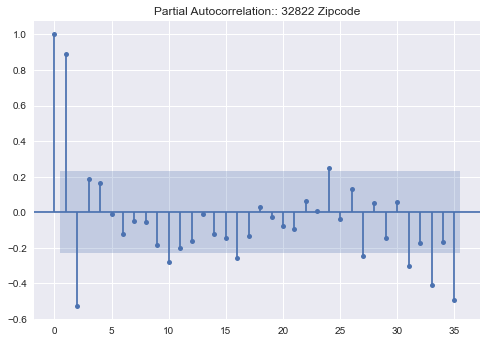

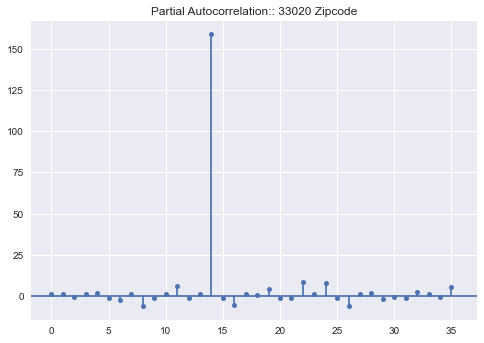

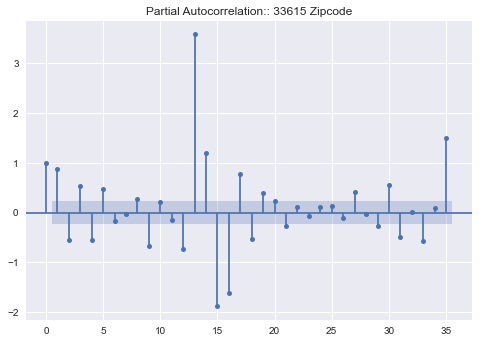

In [66]:
for col in log_dif_df.columns:
    title = 'Partial Autocorrelation:: '+ col + ' Zipcode'
    lags = 35
    plot_pacf(log_dif_df[col],title=title,lags=lags)


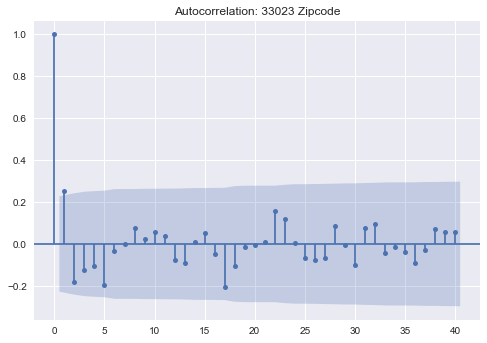

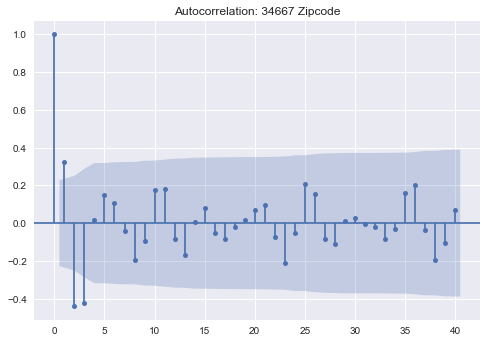

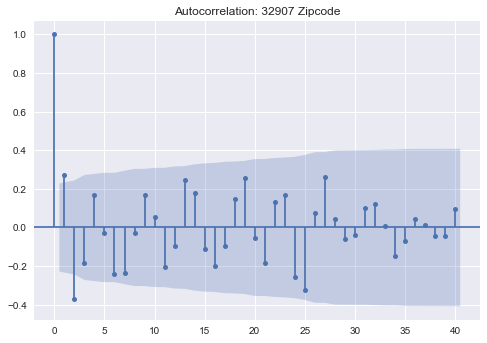

In [67]:
# ACF for second order differenced data

for col in rest_df.columns:
    title = 'Autocorrelation: '+ col + ' Zipcode'
    lags = 40
    plot_acf(rest_df[col],title=title,lags=lags)
    #plt.figure(figsize=(15,3))
    #pd.plotting.autocorrelation_plot(df_final[col]);

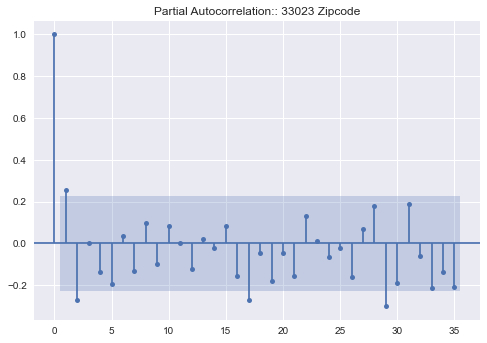

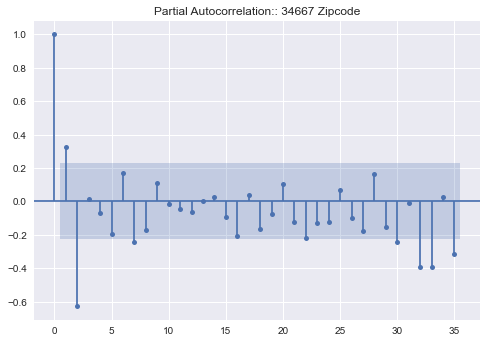

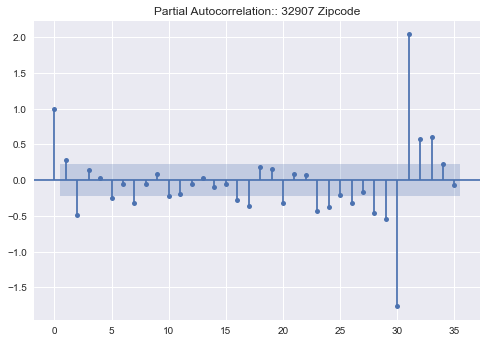

In [68]:
for col in rest_df.columns:
    title = 'Partial Autocorrelation:: '+ col + ' Zipcode'
    lags = 35
    plot_pacf(rest_df[col],title=title,lags=lags)



* Based on **ACF and PACF results** the **ARMA model with right AR and MA orders** would work for baseline model.

# Baseline Model

## Train Test Split

* To proceed with modeling, I will create **12 separate datasets** with **time as index and median price as value** and **transform** them in accordance with previous observations.

In [69]:
final_df = pd.concat([log_dif_df, rest_df], axis = 1)
final_df.dropna(inplace = True)
final_df.head()

,33064,33313,33319,33068,32839,33435,32822,33020,33615,33023,34667,32907
2012-04-01,0.001149,0.000000,0.012085,0.001098,0.005682,-0.015095,0.007605,0.017613,-0.004137,1400.0,500.0,300.0
2012-05-01,0.008005,0.004274,0.003996,0.000000,0.014065,-0.015326,0.025318,0.015549,-0.005179,600.0,400.0,-400.0
2012-06-01,0.010198,0.006376,0.004973,-0.001098,0.020733,0.001286,0.032707,0.016433,0.001036,-400.0,-300.0,-300.0
2012-07-01,0.007861,0.004228,0.006920,-0.002200,0.016283,0.014040,0.029853,0.019213,0.005179,-200.0,-200.0,0.0
2012-08-01,0.005577,0.003160,0.000000,-0.002205,0.006707,0.012595,0.025911,0.020048,0.000000,0.0,-200.0,700.0


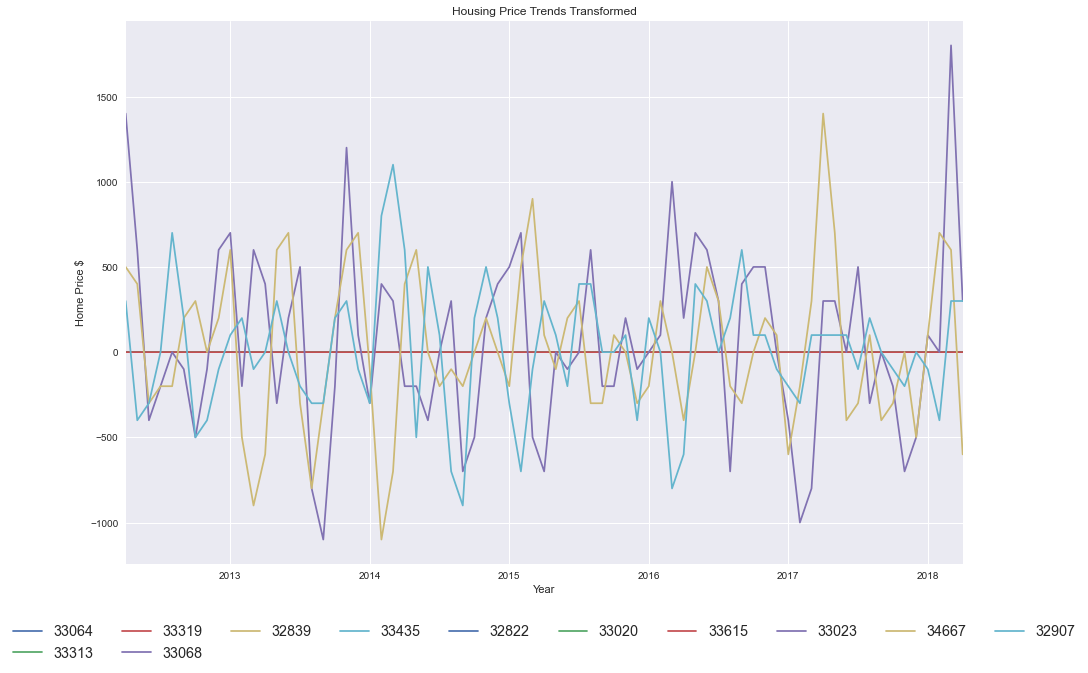

In [70]:
final_df.plot(figsize=(15,10))
plt.title("Housing Price Trends Transformed")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')

In [71]:
df_33064 = pd.DataFrame(final_df['33064'])
df_33064.index.name = 'time'
df_33313 = pd.DataFrame(final_df['33313'])
df_33313.index.name = 'time'
df_33319 = pd.DataFrame(final_df['33319'])   
df_33319.index.name = 'time'
df_33068 = pd.DataFrame(final_df['33068'])
df_33068.index.name = 'time'
df_33435 = pd.DataFrame(final_df['33435'])
df_33435.index.name = 'time'
df_32839 = pd.DataFrame(final_df['32839'])
df_32839.index.name = 'time'
df_32822 = pd.DataFrame(final_df['32822'])
df_32822.index.name = 'time'
df_33023 = pd.DataFrame(final_df['33023'])
df_33023.index.name = 'time'
df_33020 = pd.DataFrame(final_df['33020'])
df_33020.index.name = 'time'
df_33615 = pd.DataFrame(final_df['33615'])
df_33615.index.name = 'time'
df_34667 = pd.DataFrame(final_df['34667'])
df_34667.index.name = 'time'
df_32907 = pd.DataFrame(final_df['32907'])
df_32907.index.name = 'time'


* The holdout set will be 20% of the data, the test set will consist of 20% of 80% that was left for trainig.

In [72]:
train_1,test_1,hold_1 = ed.train_test_holdout_split(df_33064.dropna())
train_2,test_2,hold_2 = ed.train_test_holdout_split(df_33313.dropna())
train_3,test_3,hold_3 = ed.train_test_holdout_split(df_33319.dropna())
train_4,test_4,hold_4 = ed.train_test_holdout_split(df_33068.dropna())
train_5,test_5,hold_5 = ed.train_test_holdout_split(df_33435.dropna())
train_6,test_6,hold_6 = ed.train_test_holdout_split(df_32839.dropna())

train_7,test_7,hold_7 = ed.train_test_holdout_split(df_32822.dropna())
train_8,test_8,hold_8 = ed.train_test_holdout_split(df_33023.dropna())
train_9,test_9,hold_9 = ed.train_test_holdout_split(df_33020.dropna())
train_10,test_10,hold_10 = ed.train_test_holdout_split(df_33615.dropna())
train_11,test_11,hold_11 = ed.train_test_holdout_split(df_34667.dropna())
train_12,test_12,hold_12 = ed.train_test_holdout_split(df_32907.dropna())

# Auto - ARIMA for all Zipcodes

In [73]:
# create dataframe to store models' parameters
metrics = pd.DataFrame(columns = ['Order', 'AIC', 'Testing RMSE'], index = final_df.columns)

## 33064 Zipcode Model

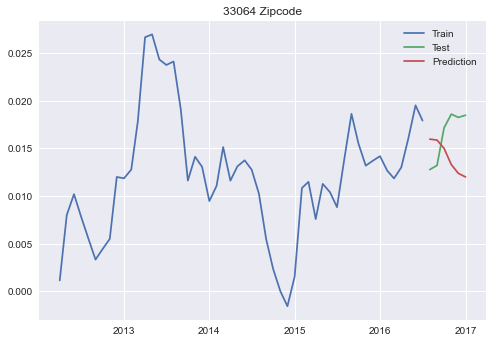

Testing RMSE =  0.004589176515297888


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(4, 0, 0)   Log Likelihood                 228.223
Date:                Wed, 15 Sep 2021   AIC                           -444.446
Time:                        18:39:11   BIC                           -432.738
Sample:                             0   HQIC                          -439.957
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0023      0.001      2.594      0.009       0.001       0.004
ar.L1          1.2830      0.138      9.264      0.000       1.012       1.554
ar.L2         -0.7666      0.236     -3.242      0.001      -1.230      -0.303
ar.L3          0.6331      0.277      2.289      0.022       0.091       1.175
ar.L4         -0.3464      0.184     -1.884      0.060      -0.707       0.014
sigma2      8.629e-06   2.17e-06      3.972      0.000    4.37e-06    1.29e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.65   Prob(JB):                         0.34
Heteroskedasticity (H):               0.42   Skew:                             0.46
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
model_1 = auto_arima(train_1, stationary = True, start_p = 1, start_q = 0, seasonal = False)
tsf.evaluate_auto_arima(model_1, train_1, test_1, metrics)

### Forecast for 33064 Zipcode

In [81]:
train, test, hold = ed.train_test_holdout_split(fl_df[['33023']].dropna())

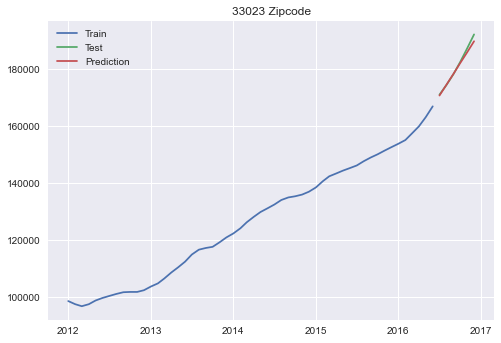

Testing RMSE =  1153.9786248742507


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -398.060
Date:                Wed, 15 Sep 2021   AIC                            798.120
Time:                        18:44:26   BIC                            800.072
Sample:                             0   HQIC                           798.868
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.606e+05   4.92e+04      5.295      0.000    1.64e+05    3.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.33   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.07   Prob(JB):                         0.85
Heteroskedasticity (H):               0.77   Skew:                             0.19
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
model_1 = auto_arima(train, stationary = False, start_p = 1, start_q = 0, seasonal = False)
tsf.evaluate_auto_arima(model_1, train, test, metrics)

## 33157 Zipcode Model

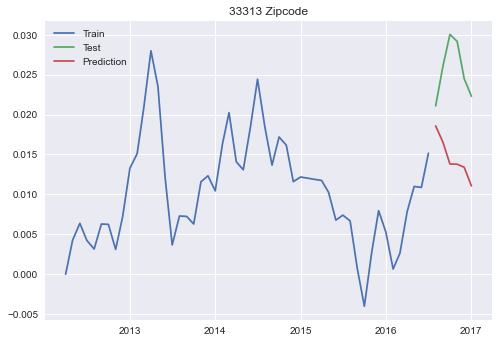

Testing RMSE =  0.011868615475176822


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(4, 0, 0)   Log Likelihood                 226.824
Date:                Wed, 15 Sep 2021   AIC                           -441.648
Time:                        18:40:18   BIC                           -429.940
Sample:                             0   HQIC                          -437.159
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0027      0.001      2.783      0.005       0.001       0.005
ar.L1          1.4494      0.132     11.005      0.000       1.191       1.708
ar.L2         -1.2424      0.223     -5.572      0.000      -1.679      -0.805
ar.L3          1.0249      0.208      4.925      0.000       0.617       1.433
ar.L4         -0.4863      0.116     -4.181      0.000      -0.714      -0.258
sigma2      8.994e-06   2.63e-06      3.417      0.001    3.83e-06    1.42e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.53
Prob(Q):                              0.74   Prob(JB):                         0.47
Heteroskedasticity (H):               0.59   Skew:                             0.20
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
model_2 = auto_arima(train_2, start_p = 1, start_q = 0, seasonal = False)
tsf.evaluate_auto_arima(model_2, train_2, test_2, metrics)

## 32825 Zipcode Model

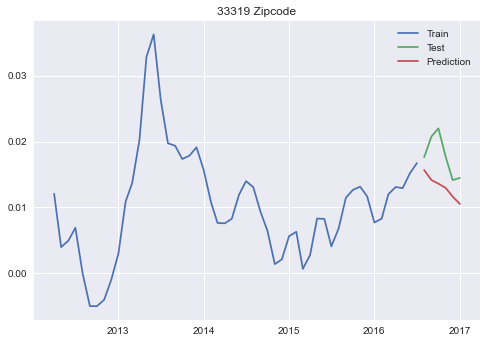

Testing RMSE =  0.0051973120932223265


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(4, 0, 0)   Log Likelihood                 228.624
Date:                Wed, 15 Sep 2021   AIC                           -445.248
Time:                        18:41:00   BIC                           -433.541
Sample:                             0   HQIC                          -440.760
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      0.001      2.744      0.006       0.001       0.004
ar.L1          1.6378      0.152     10.793      0.000       1.340       1.935
ar.L2         -1.3531      0.244     -5.540      0.000      -1.832      -0.874
ar.L3          0.9979      0.194      5.144      0.000       0.618       1.378
ar.L4         -0.4691      0.102     -4.613      0.000      -0.668      -0.270
sigma2      8.315e-06   1.75e-06      4.752      0.000    4.88e-06    1.17e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.93   Prob(JB):                         0.64
Heteroskedasticity (H):               0.38   Skew:                             0.31
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
model_3 = auto_arima(train_3, start_p = 1, start_q = 0, seasonal = False)
tsf.evaluate_auto_arima(model_3, train_3, test_3, metrics)

## 33463 Zipcode Model

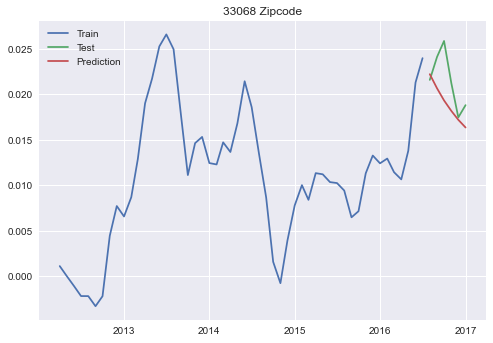

Testing RMSE =  0.003432795228852731


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 232.798
Date:                Wed, 15 Sep 2021   AIC                           -457.595
Time:                        18:41:39   BIC                           -449.790
Sample:                             0   HQIC                          -454.603
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      1.391      0.164      -0.001       0.004
ar.L1          0.8588      0.088      9.719      0.000       0.686       1.032
ma.L1          0.6621      0.131      5.050      0.000       0.405       0.919
sigma2      7.158e-06   1.63e-06      4.399      0.000    3.97e-06    1.03e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.55   Prob(JB):                         0.62
Heteroskedasticity (H):               1.03   Skew:                             0.22
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
model_4 = auto_arima(train_4, start_p = 1, start_q = 0, seasonal = False)
tsf.evaluate_auto_arima(model_4, train_4, test_4, metrics)

## 34698 Zipcode Model

In [ ]:
model_5 = auto_arima(train_5)
tsf.evaluate_auto_arima(model_5, train_5, test_5, metrics)

## 33020 Zipcode Model

In [ ]:
model_6 = auto_arima(train_6)
tsf.evaluate_auto_arima(model_6, train_6, test_6, metrics)

## 33033 Zipcode Model

In [ ]:
model_7 = auto_arima(train_7)
tsf.evaluate_auto_arima(model_7, train_7, test_7, metrics)

## 32771 Zipcode Model

In [ ]:
model_8 = auto_arima(train_8,seasonal=True)
tsf.evaluate_auto_arima(model_8, train_8, test_8, metrics)

In [ ]:
metrics

* **Model 1** (33064) showed the best results in terms of **AIC value (2611)** and **Model 7** (33033) showed best results for **Testing RMSE (379.3)**. I will **plot the diagnostics** for those two models to obtain more details.

In [ ]:
model_1.plot_diagnostics(figsize=(7, 10))

In [ ]:
model_7.plot_diagnostics(figsize=(7, 10))

### Summary:

* Standardized residual graphs show that the **residual errors fluctuate around 150** for both of the models. 
* Histogram of the **Model 1** shows **normally distributed residuals**, since KDE and N are close to each other. 
* The **Normal Q-Q** graph shows **better performance of Model 1.**
* **Correlogram** shows **non significant correlation** for both models. 

# SARIMAX Model (2, 0, 0)

Now I will build SARIMAX model with (2, 0, 0) order for **all zipcodes and evaluate results.**

In [ ]:
# metrics dataframe to store metrics of all zipcodes

metrics_2 = pd.DataFrame(columns = ['AIC', 'Training RMSE','Testing RMSE'], index = df_final.columns)

# list of all train and test dataframes

train_df = [train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8]
test_df = [test_1, test_2, test_3, test_4, test_5, test_6, test_7, test_8]



In [ ]:
#call SARIMAX function 
tsf.sarimax_model(train_df, test_df, metrics_2)


In [ ]:
metrics_2

### Summary:

The **AIC parameter is higher** than in AUTO-ARIMA model, the **training set is overfitting model.**

# Facebook Prophet Model

I will build a Facebook Prophet Model since it suppose to performe better with seasonal data, be robust to shifts in trend and hande outliers well. 

### Train - Test Split

The data for FB Prophet should be non differenced, thus I will create new train and test splits for modeling.

In [ ]:
prophet_df = fl_df[['33064', '33157', '32825', '32771', '33463','34698', '33020','33033']]

In [ ]:
pdf_33064 = pd.DataFrame(prophet_df['33064'])
pdf_33157 = pd.DataFrame(prophet_df['33157'])
pdf_32825 = pd.DataFrame(prophet_df['32825'])
pdf_33463 = pd.DataFrame(prophet_df['33463'])
pdf_34698 = pd.DataFrame(prophet_df['34698'])
pdf_33020 = pd.DataFrame(prophet_df['33020'])
pdf_33033 = pd.DataFrame(prophet_df['33033'])
pdf_32771 = pd.DataFrame(prophet_df['32771'])

In [ ]:
ptrain_1,ptest_1,phold_1 = ed.train_test_holdout_split(pdf_33064)
ptrain_2,ptest_2,phold_2 = ed.train_test_holdout_split(pdf_33157)
ptrain_3,ptest_3,phold_3 = ed.train_test_holdout_split(pdf_32825)
ptrain_4,ptest_4,phold_4 = ed.train_test_holdout_split(pdf_33463)
ptrain_5,ptest_5,phold_5 = ed.train_test_holdout_split(pdf_34698)
ptrain_6,ptest_6,phold_6 = ed.train_test_holdout_split(pdf_33020)
ptrain_7,ptest_7,phold_7 = ed.train_test_holdout_split(pdf_33033)
ptrain_8,ptest_8,phold_8 = ed.train_test_holdout_split(pdf_32771)

In [ ]:
# the function returns the datasets with resetted index and column names ds and y, 
# since that's a FB Prophet convention
ed.prophet_df([ptrain_1, ptest_1])
ed.prophet_df([ptrain_2, ptest_2])
ed.prophet_df([ptrain_3, ptest_3])
ed.prophet_df([ptrain_4, ptest_4])
ed.prophet_df([ptrain_5, ptest_5])
ed.prophet_df([ptrain_6, ptest_6])
ed.prophet_df([ptrain_7, ptest_7])
ed.prophet_df([ptrain_8, ptest_8])

### 33064 Zipcode 

In [ ]:
pmodel_1 = Prophet(weekly_seasonality=True, daily_seasonality=True)
pmodel_1.fit(ptrain_1)

In [ ]:
pdf_1 = pmodel_1.make_future_dataframe(periods=len(ptest_1), freq='MS')

In [ ]:
forecast_1 = pmodel_1.predict(pdf_1)
forecast_1.head()

In [ ]:
pmodel_1.plot(forecast_1, uncertainty=True)
plt.show()

In [ ]:
pmodel_1.plot_components(forecast_1)
plt.show()

* Now I will plot forecast values with actual values and calculate the RMSE

In [ ]:
y_pred = forecast_1['yhat'][-22:].values

testing_MSE = mean_squared_error(ptest_1, y_pred)**.5
print('Testing RMSE = ', testing_MSE)

#mae_1 = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)

# plot expected vs actual
plt.plot(ptest_1.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### 33033 Zipcode

In [ ]:
pmodel_7 = Prophet(weekly_seasonality=True, daily_seasonality=True)
pmodel_7.fit(ptrain_7)

In [ ]:
pdf_7 = pmodel_7.make_future_dataframe(periods=len(ptest_7), freq='MS')

In [ ]:
forecast_7 = pmodel_7.predict(pdf_7)
forecast_7.head()

In [ ]:
pmodel_7.plot(forecast_7, uncertainty=True)
plt.show()

In [ ]:
pmodel_7.plot_components(forecast_7)
plt.show()

* Now I will plot forecast values with actual values and calculate the RMSE

In [ ]:
y_pred = forecast_7['yhat'][-22:].values

testing_MSE = mean_squared_error(ptest_7, y_pred)**.5
print('Testing RMSE = ', testing_MSE)

#mae_1 = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)

# plot expected vs actual
plt.plot(ptest_7.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### 33157 Zipcode

In [ ]:
pmodel_2 = Prophet(weekly_seasonality=True, daily_seasonality=True)
pmodel_2.fit(ptrain_2)

In [ ]:
pdf_2 = pmodel_2.make_future_dataframe(periods=len(ptest_2), freq='MS')

In [ ]:
forecast_2 = pmodel_2.predict(pdf_2)
forecast_2.head()

In [ ]:
pmodel_2.plot(forecast_2, uncertainty=True)
plt.show()

In [ ]:
pmodel_2.plot_components(forecast_2)
plt.show()

* Now I will plot forecast values with actual values and calculate the RMSE

In [ ]:
y_pred = forecast_2['yhat'][-22:].values

testing_MSE = mean_squared_error(ptest_2, y_pred)**.5
print('Testing RMSE = ', testing_MSE)

#mae_1 = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)

# plot expected vs actual
plt.plot(ptest_2.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### Summary:

After building models for three datasets, it is clear that **Facebook Prophet performed worse than ARIMA models**. The **Mean Squared Error is higher with Prophet** and due to noticable fluctuation in dataset, the model **forecasts in downward direction**, whereas the **actual values go up**.

## Final Model SARIMAX (2, 0, 0) with Holdout Data

The evaluation of all models showed that **SARIMAX model built by auto-ARIMA** for zipcode "33064" **performed better** than others. Thus, I will build SARIMAX model with test and holdout data.

In [ ]:
# metrics dataframe to store metrics of all zipcodes

metrics_hold = pd.DataFrame(columns = ['AIC', 'Training RMSE','Testing RMSE'], index = df_final.columns)

# holdout dataframes

holdout_df = [hold_1, hold_2, hold_3, hold_4, hold_5, hold_6, hold_7, hold_8]

In [ ]:
#call SARIMAX function 
f_ct1, f_ct2, f_ct3, f_ct4, f_ct5, f_ct6, f_ct7, f_ct8 = tsf.sarimax_final_model(train_df, 
                                                                                 test_df, holdout_df, 
                                                                                 metrics_hold)

In [ ]:
metrics_hold

# Results and Conclusion

Based on model metrics, the following zipcodes are the best options: **33064, 32825, 32771, 33033, 34698**. Now, I will calculate the actual values of the forecast and print out last metrics.

In [ ]:
#forecast_df = [f_ct1, f_ct3, f_ct4, f_ct6, f_ct8]

In [ ]:
# f_df1 = pd.DataFrame(fl_df['33064'])
# f_df2 = pd.DataFrame(fl_df['32825'])
# f_df3 = pd.DataFrame(fl_df['34698'])
# f_df4 = pd.DataFrame(fl_df['33033'])
# f_df5 = pd.DataFrame(fl_df['32771'])

# final_df = [f_df1, f_df2, f_df3, f_df4, f_df5]

# for df in final_df:
#     df.reset_index(drop=True, inplace=True)

In [ ]:
# def calc_median(df):
#     return df.median()
    
# def calc_forecast_ROI(forecast):
    
#     return ((np.exp(forecast.iloc[-1]) - np.exp(forecast.iloc[-2]))/
#             np.exp(forecast.iloc[-1]))

# def final_ROI(dfs, forecasts, roi):
#     comparison = pd.DataFrame(columns=['Median_Housing_Price','Actual_2018_ROI', 'Forecast_2018_ROI'], 
#                               index = ['33064', '32825', '34698', '33033', '32771'])
    
# #     for i in range(len(comparison.columns)):
# #         comparison[[0][i]] = dfs[i][:,0].median(axis = 0)
# #         comparison[[1][i]] = round(roi[i], 3)
# #         comparison[[2][i]] = round(100*calc_forecast_ROI(forecasts[i]),2)
        
#     for i in range(len(dfs)):
#         comparison['Median_Housing_Price'].loc[list(dfs[i].columns)[0]] = list(dfs[i].median())[0]
#         comparison['Actual_2018_ROI'].loc[list(dfs[i].columns)[0]] = round(roi[list(dfs[i].columns)[0]], 3)
#         comparison['Forecast_2018_ROI'].loc[list(dfs[i].columns)[0]] = round(100*calc_forecast_ROI(forecasts[i]),2)
        
    
    
    
# #     for i, df in enumerate(dfs):
# #         metrics = [df.iloc[0,-1], round(roi.loc[list(df.columns)[1]]), 
# #                    round(100*calc_forecast_ROI(forecasts[i]),2)]
# #         comparison[df[[list(df.columns)[0][0]]] = metrics        
#     return comparison


In [ ]:
# final_metric = final_ROI(final_df, forecast_df, roi)
# final_metric

### Results:

* All **training data overfitted models**.
* The **models are all very skewed** because of the market crash in 2009.
* Relying on the project assumptions, data exploration and modeling, following zipcodes are chosen as best ones to invest in:**33064, 32825, 32771, 33033, 34698**

### Notes:

* Real estate **predictions** may vary due to **unseen fluctuations** in the market.

### Next Steps:

* Obtain **data after 2018 for current predictions.
* Use **samples only after Great Recession** period to model.
* Set **ROI threshold to lower values.**

In [ ]:
calc_forecast_ROI(f_ct3)

In [ ]:
list(f_ct1[0]).predicted_mean()

In [ ]:
list(final_df[0].median())[0]

In [ ]:
roi['33064']

In [ ]:
list(final_df[0].columns)[0]

In [ ]:
type(roi)

In [ ]:
list(f_df1.columns)[0]